In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#from MyUnit import NaturalUnit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.linalg import expm

In [4]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import simpson, trapezoid
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from tqdm import tqdm
import pickle
from scan import Param
import scan as sc
from copy import deepcopy

In [5]:
import sys
sys.path.insert(0, '/home/chen/Code/varying_magnetic_field/')
import base as ba

In [6]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

# Solve the coupled ODE

In [6]:
xi=-800
xe=800
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0. #100
ma2_over_om = ma**2/omega
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


x_arr = np.linspace(xi, xe, 500)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)

plt.subplots()
plt.plot(x_arr, sin_alpha_arr, label=r"$d\theta/dx$=%.1g eV, d$m^2$/dx=%.1g eV$^3$"
         %(dthdx,dmg2_over_om_dx))
plt.legend()

<IPython.core.display.Javascript object>

In [7]:

# xi=-5000
# xe=5000
# ma=1
# omega=1
# cB=0.01
# dmg2_over_om_dx = 0.001 #0.008
# dthdx=0.01
# ma2_over_om = ma**2/omega
# def theta_fn(x): return dthdx * x
# def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


# sol_th_0_001 = solve_ivp(ba.derivs,
#                    [xi, xe],
#                    [0.+0.j, 0.+0.j, 1.+0.j],     
#                    method='RK45',
#                    # method='DOP853',vectorized=True,
#                    rtol=1e-10,
#                    atol=1e-10,
#                    args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
xi=-800
xe=800
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0. #100
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx



sol = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.01
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


sol_th_0_001 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


sol_th_0 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])

xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.5
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


sol_th_1 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
plt.subplots()
plt.plot(sol.t, np.abs(sol.y[2])**2, label=r'$\dot\theta$=0.')
plt.plot(sol_th_0.t, np.abs(sol_th_0.y[2])**2, label=r'$\dot\theta$=0.2')
plt.plot(sol_th_1.t, np.abs(sol_th_1.y[2])**2, label=r'$\dot\theta$=0.5')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{aa}$')
#plt.yscale('log')

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(211)
ax.plot(sol.t, 1-np.abs(sol.y[2])**2, label=r'$\dot\theta$=0.')
ax.plot(sol_th_0.t, 1-np.abs(sol_th_0.y[2])**2, label=r'$\dot\theta$=0.2')
ax.plot(sol_th_1.t, 1-np.abs(sol_th_1.y[2])**2, label=r'$\dot\theta$=0.5')
ax.legend()
ax.set_ylabel(r'$P_{a\gamma}$')
ax.set_ylim(1e-5, 3)
ax.set_yscale('log')

ax2 = fig.add_subplot(212, sharex=ax)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)
ax2.plot(x_arr, sin_alpha_arr)
ax2.set_ylabel(r'$\sin(\alpha)$', size =16)
ax2.set_xlabel('x')



# More realistic $\theta(x)$ form

In [ ]:
xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 31.
domain_arr = np.arange(xi, xe, domain_size)
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


In [ ]:
x_arr = np.linspace(xi, xe, 500)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)

plt.subplots()
plt.plot(x_arr, sin_alpha_arr, label=r"$d\theta/dx$=%.1g eV, d$m^2$/dx=%.1g eV$^3$"
         %(dthdx,dmg2_over_om_dx))
plt.yscale('log')
plt.legend()

In [ ]:
x_arr = np.linspace(xi, xe, 200)
theta_arr = np.array([theta_fn(x) for x in x_arr])
plt.subplots()
plt.plot(x_arr, theta_arr)
plt.xlabel(r'x')
plt.ylabel(r'$\theta(x)$')

In [ ]:
xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.5
ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/dthdx #5.
domain_arr = np.arange(xi, xe, domain_size)
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_0_dom10 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/dthdx #20.
domain_arr = np.arange(xi, xe, domain_size)
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_0_dom30 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.01
ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/dthdx #2.*np.pi/0.1 #20.
domain_arr = np.arange(xi, xe, domain_size)
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_0_dom_large = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
# todo: set a seed for the random number generator so that it can be reproduced.

In [ ]:
plt.subplots()

#plt.plot(sol_th_0_dom60.t, 1.-np.abs(sol_th_0_dom60.y[2])**2, 'k', label=r'dom=2$\pi/0.1\approx 60$')
plt.plot(sol_th_0_001.t, 1.-np.abs(sol_th_0_001.y[2])**2, 'C4--', label=r'$\dot\theta$=0.01')
plt.plot(sol_th_0_dom_large.t, 1.-np.abs(sol_th_0_dom_large.y[2])**2, 'k', label=r'dom=2$\pi/0.01\approx 630$')
plt.plot(sol_th_0.t, 1.-np.abs(sol_th_0.y[2])**2, 'C0--', label=r'$\dot\theta$=0.2')
plt.plot(sol_th_0_dom30.t, 1.-np.abs(sol_th_0_dom30.y[2])**2, 'C1', label=r'dom=2$\pi/0.2\approx 31$')
plt.plot(sol_th_1.t, 1.-np.abs(sol_th_1.y[2])**2, 'C2--', label=r'$\dot\theta$=0.5')
plt.plot(sol_th_0_dom10.t, 1.-np.abs(sol_th_0_dom10.y[2])**2, 'C3', label=r'dom=2$\pi/0.5\approx 13$')


plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{a\gamma}$')

# Non-resonance case

In [ ]:
# determine the parameter first
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
#dmg2_over_om_dx = 0.001 #0.008
#dthdx=0. #100
#ma2_over_om = ma**2/omega
def mg2_over_om_fn(x): 
    return (x)*0.


x_arr = np.linspace(xi, xe, 500)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)

plt.subplots()
plt.plot(x_arr, sin_alpha_arr)
plt.legend()

In [ ]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
#dmg2_over_om_dx = 0.001 #0.008
#dthdx=0.2
#ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.01 #5.
domain_arr = np.arange(xi, xe, domain_size)

# note I'm setting the rnd seed!!! Don't be fooled for the large/small results
np.random.seed(0) 
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    res = 0.*res
    return res


sol_th_nr_dom_inf = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
#dmg2_over_om_dx = 0.001 #0.008
#dthdx=0.2
#ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.1 #5.
domain_arr = np.arange(xi, xe, domain_size)

# note I'm setting the rnd seed!!! Don't be fooled for the large/small results
#np.random.seed(3) 
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_nr_dom60 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
#dmg2_over_om_dx = 0.001 #0.008
#dthdx=0.2
#ma2_over_om = ma**2/omega

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

domain_size = 2.*np.pi/0.5 #5.
domain_arr = np.arange(xi, xe, domain_size)

# note I'm setting the rnd seed!!! Don't be fooled for the large/small results
np.random.seed(0) 
domain_phase = np.random.rand(len(domain_arr)) * 2.*np.pi
def theta_fn(x):
    idx = np.searchsorted(domain_arr, x, side='right')
    if idx == len(domain_arr):
        idx = idx - 1
    phase = domain_phase[idx]
    res = phase + (x-domain_arr[idx])/domain_size*2.*np.pi
    return res


sol_th_nr_dom13 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
plt.subplots()

#plt.plot(sol_th_0_dom60.t, 1.-np.abs(sol_th_0_dom60.y[2])**2, 'k', label=r'dom=2$\pi/0.1\approx 60$')
# plt.plot(sol_th_0_dom_large.t, 1.-np.abs(sol_th_0_dom_large.y[2])**2, 'k', label=r'dom=2$\pi/0.01\approx 630$')
# plt.plot(sol_th_0.t, 1.-np.abs(sol_th_0.y[2])**2, 'C0--', label=r'$\dot\theta$=0.2')
# plt.plot(sol_th_0_dom30.t, 1.-np.abs(sol_th_0_dom30.y[2])**2, 'C1', label=r'dom=2$\pi/0.2\approx 31$')
# plt.plot(sol_th_1.t, 1.-np.abs(sol_th_1.y[2])**2, 'C2--', label=r'$\dot\theta$=0.5')

#plt.plot(sol_th_nr_dom13.t, 1.-np.abs(sol_th_nr_dom13.y[2])**2)
plt.plot(sol_th_nr_dom_inf.t, 1.-np.abs(sol_th_nr_dom_inf.y[2])**2, label=r'no $\theta$ change')
plt.plot(sol_th_nr_dom60.t, 1.-np.abs(sol_th_nr_dom60.y[2])**2, label=r'numerical, domain=$2\pi/0.1$')

# compare with Seokhoon's analytical results
x_arr = np.linspace(xi, xe, 200)
P_ag_ana = ba.Pag_nr_analytical(x_arr, 0.1, cB)
plt.plot(x_arr, P_ag_ana, '--',label=r'analytical, $\dot\theta=0.1$')


plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{a\gamma}$')
plt.ylim(1e-10, 1)
plt.yscale('log')

In [ ]:
# compare with Seokhoon's analytical expression
# DONE

# $\theta$ discontinuous in second order

I will check Seokhoon's new computation where he shows the non-adiabatic region is small. 

In [ ]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01
rnd_seed=2

x_arr = np.linspace(xi, xe, 500)
domain_size = 30

res = ba.get_theta(x_arr, domain_size, rnd_seed=rnd_seed)
plt.subplots()
plt.plot(x_arr, np.abs(res[0]/res[0][1]), '-')
plt.plot(x_arr, np.abs(res[1]), '-')
plt.plot(x_arr, np.abs(res[2]), '-')
plt.yscale('symlog', linthreshy=0.1)
#plt.plot()
#plt.ylim(-0.05, 0.05)

In [ ]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01

x_arr = np.linspace(xi, xe, 500)
domain_size = 30
res = ba.get_theta(x_arr, domain_size, rnd_seed=2)
plt.subplots()
plt.plot(x_arr, res[0], '-')
#plt.plot(x_arr, res[1]-res[1][0], '-')
#plt.plot(x_arr, res[2]/res[2][0], '-')
#plt.yscale('log')
#plt.plot()
#plt.ylim(-0.05, 0.05)

In [ ]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01

x_arr = np.linspace(xi, xe, 500)
domain_size = 30
res = ba.get_theta(x_arr, domain_size, rnd_seed=None)
plt.subplots()
#plt.plot(x_arr, res[2], '-')
plt.plot(x_arr, res[1], '-')
#plt.plot(x_arr, res[0], '-')
#plt.plot(x_arr, np.diff(res[1], prepend=res[1][0])/(x_arr[1]-x_arr[0]), '-')
#plt.plot(x_arr, res[0]/res[0][0], '-')
#plt.plot(x_arr, res[1]-res[1][0], '-')
#plt.plot(x_arr, res[2]/res[2][0], '-')
#plt.yscale('log')
#plt.plot()
#plt.ylim(-0.05, 0.05)
plt.xlabel('x')
plt.ylabel(r'$\dot \theta$')

In [ ]:
xi=-800
xe=800
ma=0.
omega=1
cB=0.01

x_arr = np.linspace(xi, xe, 500)
domain_size = 30
res = ba.get_theta(x_arr, domain_size, rnd_seed=None)
plt.subplots()
plt.plot(x_arr, res[2], '-')
#plt.plot(x_arr, res[1], '-')
#plt.plot(x_arr, res[0], '-')
#plt.plot(x_arr, np.diff(res[1], prepend=res[1][0])/(x_arr[1]-x_arr[0]), '-')
#plt.plot(x_arr, res[0]/res[0][0], '-')
#plt.plot(x_arr, res[1]-res[1][0], '-')
#plt.plot(x_arr, res[2]/res[2][0], '-')
#plt.yscale('log')
#plt.plot()
#plt.ylim(-0.05, 0.05)
plt.xlabel('x')
plt.ylabel(r'$\theta$')

In [ ]:
# t_arr = np.linspace(0, 10)
# v_arr = np.random.rand(len(t_arr))-0.5
# plt.subplots()
# plt.plot(t_arr, v_arr)
# plt.plot(t_arr, np.diff(v_arr, prepend=0))

#### check the survival probability

In [ ]:
#
# set the parameters
#

xi=-5000
xe=5000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.01
ma2_over_om = ma**2/omega
rnd_seed=2

# 
# make the magnetic domain array
#

domain_size = 2.*np.pi/dthdx
domain_arr = np.arange(xi, xe, domain_size)
theta_arr = ba.get_theta(domain_arr, 
                   domain_size, 
                   rnd_seed=rnd_seed)

plt.subplots()
plt.plot(domain_arr, theta_arr[0]/theta_arr[0][-1], '-', label=r"$\ddot\theta/\ddot\theta_{-1}$")
plt.plot(domain_arr, (theta_arr[1]/theta_arr[1][-1]), '-', label=r"$\dot\theta/\dot\theta_{-1}$")
plt.plot(domain_arr, (theta_arr[2]/theta_arr[2,-1]), '-', label=r"$\theta/\theta_{-1}$")
plt.yscale('symlog', linthreshy=0.1)
plt.legend()


#
# evolve the Hamiltonian
#

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res


theta_fn = interp1d(domain_arr, 
                    theta_arr[0], 
                    bounds_error=False, 
                    fill_value="extrapolate")


sol_ddth_0 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
#
# set the parameters
#

xi=-3000
xe=3000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega
rnd_seed=2

# 
# make the magnetic domain array
#

domain_size = 2.*np.pi/dthdx
domain_arr = np.arange(xi, xe, domain_size)
theta_arr = ba.get_theta(domain_arr, 
                   domain_size, 
                   rnd_seed=rnd_seed)

plt.subplots()
plt.plot(domain_arr, theta_arr[0]/theta_arr[0][-1], '-', label=r"$\ddot\theta/\ddot\theta_{-1}$")
plt.plot(domain_arr, (theta_arr[1]/theta_arr[1][-1]), '-', label=r"$\dot\theta/\dot\theta_{-1}$")
plt.plot(domain_arr, (theta_arr[2]/theta_arr[2,-1]), '-', label=r"$\theta/\theta_{-1}$")
plt.yscale('symlog', linthreshy=0.1)
plt.legend()



#
# evolve the Hamiltonian
#

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = ma2_over_om + (x)*dmg2_over_om_dx
    res[res>ma2_over_om * 5.]=ma2_over_om * 5.
    res[res<ma2_over_om * (-5.)]=ma2_over_om * (-5.)
    if is_scalar:
        res = np.squeeze(res)
    return res


theta_fn = interp1d(domain_arr, 
                    theta_arr[0], 
                    bounds_error=False, 
                    fill_value="extrapolate")


sol_ddth_02 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
plt.subplots()


# plt.plot(sol_th_0.t, 1.-np.abs(sol_th_0.y[2])**2, 'C0--', label=r'$\dot\theta$=0.2')
# plt.plot(sol_th_0_dom30.t, 1.-np.abs(sol_th_0_dom30.y[2])**2, 'C1', label=r'dom=2$\pi/0.2\approx 31$')
# plt.plot(sol_ddth_02.t, 1.-np.abs(sol_ddth_02.y[2])**2, 'C2', label=r'dom=2$\pi/0.2\approx 31, \ddot\theta$')

# plt.plot(sol_th_1.t, 1.-np.abs(sol_th_1.y[2])**2, 'C2--', label=r'$\dot\theta$=0.5')
# plt.plot(sol_th_0_dom10.t, 1.-np.abs(sol_th_0_dom10.y[2])**2, 'C3', label=r'dom=2$\pi/0.5\approx 13$')

plt.plot(sol_th_0_001.t, 1.-np.abs(sol_th_0_001.y[2])**2, 'r--', label=r'$\dot\theta$=0.01', zorder=20)
plt.plot(sol_th_0_dom_large.t, 1.-np.abs(sol_th_0_dom_large.y[2])**2, 'g', label=r'dom=2$\pi/0.01\approx 630$')
plt.plot(sol_ddth_0.t, 1.-np.abs(sol_ddth_0.y[2])**2, 'b', label=r'dom=2$\pi/0.01\approx 630, \ddot\theta$')


plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{a\gamma}$')

#### non-resonant case

In [ ]:
#
# set the parameters
#

xi=0.
xe=0.4
ma=0.
omega=1
cB=1.
dmg2_over_om_dx = 0.001 #0.008
#dthdx=100
dthdx=5000
ma2_over_om = ma**2/omega
rnd_seed=None

# 
# make the magnetic domain array
#

domain_size = 2.*np.pi/dthdx
domain_arr = np.arange(xi, xe, domain_size)
theta_arr = ba.get_theta(domain_arr, 
                   domain_size, 
                   rnd_seed=rnd_seed)

plt.subplots()
#plt.plot(domain_arr, theta_arr[0], '-', label=r"$\ddot\theta$")
plt.plot(domain_arr, (theta_arr[1]), '-', label=r"$\dot\theta$")
#plt.plot(domain_arr, (theta_arr[2]/theta_arr[2,-1]), '-', label=r"$\theta/\theta_{-1}$")
#plt.yscale('symlog', linthreshy=0.1)
plt.legend()


In [ ]:
#
# set the parameters
#

xi=0.
xe=0.4
ma=0.
omega=1
cB=1.
dmg2_over_om_dx = 0.001 #0.008
dthdx=100
ma2_over_om = ma**2/omega
rnd_seed=2

# 
# make the magnetic domain array
#

domain_size = 2.*np.pi/dthdx
domain_arr = np.arange(xi, xe, domain_size)
theta_arr = ba.get_theta(domain_arr, 
                   domain_size, 
                   rnd_seed=rnd_seed)

plt.subplots()
plt.plot(domain_arr, theta_arr[0]/theta_arr[0][-1], '-', label=r"$\ddot\theta/\ddot\theta_{-1}$")
plt.plot(domain_arr, (theta_arr[1]/theta_arr[1][-1]), '-', label=r"$\dot\theta/\dot\theta_{-1}$")
plt.plot(domain_arr, (theta_arr[2]/theta_arr[2,-1]), '-', label=r"$\theta/\theta_{-1}$")
plt.yscale('symlog', linthreshy=0.1)
plt.legend()


In [ ]:
#
# evolve the Hamiltonian
#

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    # make it non-resonant
    res = np.zeros_like(x)
    if is_scalar:
        res = np.squeeze(res)
    return res


theta_fn = interp1d(domain_arr, 
                    theta_arr[0], 
                    bounds_error=False, 
                    fill_value="extrapolate")


sol_ddth_nr_varyth = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   #method='RK45',
                   method='BDF',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
# constant theta case

In [ ]:
#
# set the parameters
#

xi=0.
xe=0.4
ma=0.
omega=1
cB=1.
dmg2_over_om_dx = None
dthdx=None
ma2_over_om = ma**2/omega
rnd_seed=None

# 
# make the magnetic domain array
#


domain_arr = np.linspace(xi, xe)
theta_arr = np.ones_like(domain_arr)

#
# evolve the Hamiltonian
#

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    # make it non-resonant
    res = np.zeros_like(x)
    if is_scalar:
        res = np.squeeze(res)
    return res


theta_fn = interp1d(domain_arr, 
                    theta_arr, 
                    bounds_error=False, 
                    fill_value="extrapolate")


sol_ddth_nr_const_th = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   #method='RK45',
                   method='BDF',
                   # method='DOP853',vectorized=True,
                   rtol=1e-5,
                   atol=1e-7,                                 
                   #rtol=1e-8,
                   #atol=1e-8,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


In [ ]:
plt.subplots()

# plt.plot(sol_th_0_001.t, 1.-np.abs(sol_th_0_001.y[2])**2, 'r--', label=r'$\dot\theta$=0.01', zorder=20)
# plt.plot(sol_th_0_dom_large.t, 1.-np.abs(sol_th_0_dom_large.y[2])**2, 'g', label=r'dom=2$\pi/0.01\approx 630$')
plt.plot(sol_ddth_nr_varyth.t, 1.-np.abs(sol_ddth_nr_varyth.y[2])**2, label=r'$\ddot \theta$ model')
plt.plot(sol_ddth_nr_const_th.t, 1.-np.abs(sol_ddth_nr_const_th.y[2])**2, label=r'constant $\theta$')


plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{a\gamma}$')
plt.yscale('symlog', linthreshy=1e-11)
plt.legend()

In [ ]:
# TODO: compare with Seokhoon's derivation

# Verify the experimental setup

idea: use the $\dot \theta$ to cancel the axion mass term

In [12]:
test = np.array([[1,2,3],[4,5,6],[7,8,9]])
test

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [13]:
test_idx = np.array([2,0,1])
test[:,test_idx]

array([[3, 1, 2],
       [6, 4, 5],
       [9, 7, 8]])

In [14]:
ba.diagonalize(test)

(array([-1.11684397e+00, -3.38433605e-16,  1.61168440e+01]),
 array([[ 0.78583024, -0.40824829,  0.23197069],
        [ 0.08675134,  0.81649658,  0.52532209],
        [-0.61232756, -0.40824829,  0.8186735 ]]))

In [15]:
test = np.array([[0,-1j,0],[1j,0,1],[0,1,3]])
val, U = ba.diagonalize(test, verify=True)
for veci in U:
    print(veci)

eigenvalue: [-1.12841906+0.j  0.79836032+0.j  3.33005874+0.j]
hamiltonian:
 [[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  1.+0.j]
 [ 0.+0.j  1.+0.j  3.+0.j]]
determinant:  (0.9999999999999999+0j)
unitarity: [[1.+0.00000000e+00j 0.+8.95117314e-16j 0.+0.00000000e+00j]
 [0.-8.95117314e-16j 1.+0.00000000e+00j 0.+5.55111512e-17j]
 [0.+0.00000000e+00j 0.-5.55111512e-17j 1.+0.00000000e+00j]]
U^+HU
 [[-1.12841906e+00+0.00000000e+00j  0.00000000e+00-5.55111512e-17j
  -3.05311332e-16+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  7.98360324e-01+0.00000000e+00j
   0.00000000e+00+2.49800181e-16j]
 [-2.49800181e-16+0.00000000e+00j  0.00000000e+00-2.84494650e-16j
   3.33005874e+00+0.00000000e+00j]]
check eigenvec norm:
(1+0j)
(1+0j)
(0.9999999999999999+0j)
[-0.        -0.65260047j -0.75188543+0.j          0.        +0.09370664j]
[-0.73640681+0.j         -0.        -0.60027549j -0.31204863+0.j        ]
[ 0.17837501-0.j          0.        +0.27264929j -0.94543361+0.j        ]


In [16]:
ba.diagonalize([[0,-1],[1,0]], verify=True)

eigenvalue: [0.-1.j 0.+1.j]
hamiltonian:
 [[0, -1], [1, 0]]
determinant:  -0.9999999999999999j
unitarity: [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
U^+HU
 [[0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j]]
check eigenvec norm:
(0.9999999999999999+0j)
(0.9999999999999999+0j)


(array([0.-1.j, 0.+1.j]),
 array([[-0.70710678+0.j        , -0.70710678+0.j        ],
        [-0.        -0.70710678j,  0.        +0.70710678j]]))

In [17]:
test = np.array([[-1, 0.1],[0.1, 1]])
val, U = ba.diagonalize(test, verify=True)
for veci in U:
    print(veci)

eigenvalue: [-1.00498756  1.00498756]
hamiltonian:
 [[-1.   0.1]
 [ 0.1  1. ]]
determinant:  0.9999999999999998
unitarity: [[1.00000000e+00 2.03616608e-18]
 [2.03616608e-18 1.00000000e+00]]
U^+HU
 [[-1.00498756e+00 -2.08166817e-17]
 [-2.08166817e-17  1.00498756e+00]]
check eigenvec norm:
0.9999999999999999
0.9999999999999999
[-0.99875853 -0.0498137 ]
[ 0.0498137  -0.99875853]


In [18]:
test = np.array([[0, 0.1],[0.1, 2]])
val, U = ba.diagonalize(test, verify=True)
for veci in U:
    print(veci)

eigenvalue: [-0.00498756  2.00498756]
hamiltonian:
 [[0.  0.1]
 [0.1 2. ]]
determinant:  0.9999999999999998
unitarity: [[1.00000000e+00 2.03616608e-18]
 [2.03616608e-18 1.00000000e+00]]
U^+HU
 [[-4.98756211e-03 -2.77555756e-17]
 [-2.16840434e-17  2.00498756e+00]]
check eigenvec norm:
0.9999999999999999
0.9999999999999999
[-0.99875853 -0.0498137 ]
[ 0.0498137  -0.99875853]


<IPython.core.display.Javascript object>


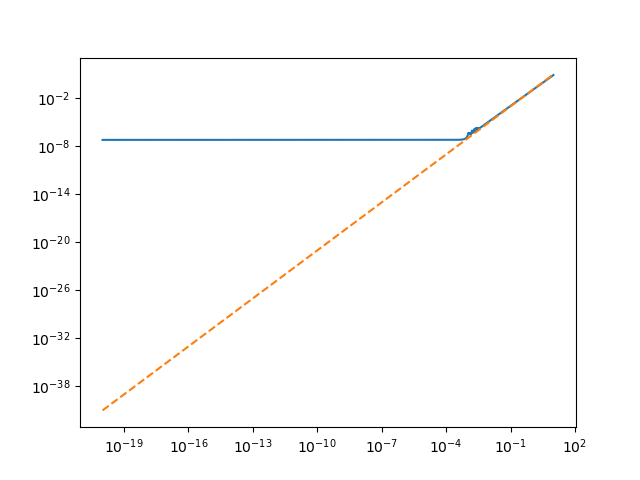

In [19]:
alps_arr = np.loadtxt('./data/ALPS.txt')
plt.subplots()
plt.plot(alps_arr[:,0], alps_arr[:,1])
plt.plot(alps_arr[:,0], alps_arr[:,0]**2/10, '--')
plt.xscale('log')
plt.yscale('log')


<IPython.core.display.Javascript object>


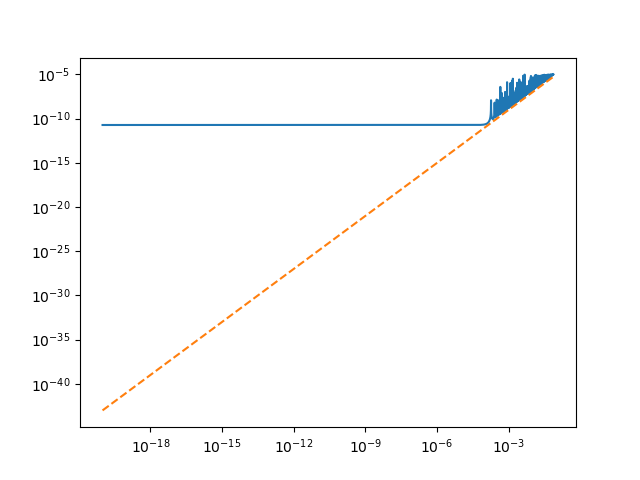

In [20]:
alps2_arr = np.loadtxt('./data/ALPS-II.txt')
plt.subplots()
plt.plot(alps2_arr[:,0], alps2_arr[:,1])
plt.plot(alps2_arr[:,0], alps2_arr[:,0]**2/1000, '--')
plt.xscale('log')
plt.yscale('log')

In [254]:
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

# helical numerical
impefect_factor = 1.000001

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_helical_0 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',
                   # method='BDF',
                   vectorized=True,
                   rtol=1e-13,
                   atol=1e-13,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)
sol_helical_0._cB_rescale_factor_ = _cB_rescale_factor_

In [255]:
cB*_cB_rescale_factor_

1.0353697510005556e-10

In [256]:
ba.get_psurv(ma=0.001, ga=1e-9, theta_dot_mean=1., num_of_domains=100, sigma=0.0)

(cB*_cB_rescale_factor_)**2/k**2 752889.9140183656
dtheta_arr [-4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07 -4.29087355e-07
 -4.29087355e-07 -4.29087355

 _cB_rescale_factor_: 359596.5771222027
             message: 'The solver successfully reached the end of the integration interval.'
                nfev: 12602
                njev: 0
                 nlu: 0
                 sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f881150fe80>
              status: 0
             success: True
                   t: array([5.06773058e+02, 5.06946192e+02, 5.08677525e+02, 5.25990856e+02,
       6.99124172e+02, 2.43045733e+03, 1.97437889e+04, 1.92877105e+05,
       8.37821608e+05, 1.48252207e+06, 2.12722272e+06, 2.77192339e+06,
       3.41662404e+06, 4.06132471e+06, 4.70602538e+06, 5.35072605e+06,
       5.99542672e+06, 6.64012739e+06, 7.28482806e+06, 7.92952874e+06,
       8.57422942e+06, 9.21893010e+06, 9.86363079e+06, 1.05083315e+07,
       1.11530322e+07, 1.17977329e+07, 1.24424336e+07, 1.30871343e+07,
       1.37318350e+07, 1.43765357e+07, 1.50212364e+07, 1.56659372e+07,
       1.63106379e+07, 1.69553386e+07, 1.76000394e+07, 1.8244

In [257]:
_cB_rescale_factor_ = 1e7 # note this factor is to combat the numerical precision floor

In [258]:
# helical numerical
impefect_factor = 1.01

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_helical_001 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',
                   # method='BDF',
                   vectorized=True,
                   rtol=1e-13,
                   atol=1e-13,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)
sol_helical_001._cB_rescale_factor_ = _cB_rescale_factor_

In [259]:
impefect_factor

1.01

In [260]:
-ma**2/(2.*omega)/_eV_over_unit_

-4.310344827586207e-07

In [261]:
theta_dot

-4.353448275862069e-07

In [262]:
# # helical numerical
# impefect_factor = 1.01

# _m_eV_ = 5067730.58270578
# _G_over_GeV2_ = 1.95352783207652e-20
# _GeV_over_eV_ = 1.e9
# _eV_over_unit_ = 1.


# xi=0. * _m_eV_ /_eV_over_unit_
# xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
# ma=1e-2*_eV_over_unit_ #[eV]
# omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
# cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
# theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

# def mg2_over_om_fn(x): 
#     x, is_scalar = ba.treat_as_arr(x)
#     res = (x)*0.
#     if is_scalar:
#         res = np.squeeze(res)
#     return res

# def theta_fn(x):
#     return theta_dot * x


# sol_helical_001_tmp = solve_ivp(ba.derivs,
#                    [xi, xe],
#                    [0.+0.j, 0.+0.j, 1.+0.j],     
#                    method='RK45',
#                    # method='DOP853',
#                    # method='BDF',
#                    vectorized=True,
#                    rtol=1e-10,
#                    atol=1e-10,
#                    args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
#                     dense_output=True)
# sol_helical_001_tmp._cB_rescale_factor_ = _cB_rescale_factor_

In [263]:
print('----make sure cB rescale factor* < (ma2/om-theta dot)----')
print('i.e. never introduce nonlinear regime due to large cB')
print(theta_dot*(impefect_factor-1.))
print(cB*_cB_rescale_factor_)

----make sure cB rescale factor* < (ma2/om-theta dot)----
i.e. never introduce nonlinear regime due to large cB
-4.353448275862073e-09
1.0353697510005556e-08


In [264]:
_cB_rescale_factor_ = 1e8 # note this factor is to combat the numerical precision floor

In [265]:
# helical numerical
impefect_factor = 1.03

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_helical_003 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',vectorized=True,
                   #rtol=1e-8,
                   # rtol=1e-15,
                   #atol=1e-8,
                   # atol=1e-15,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)

sol_helical_003._cB_rescale_factor_ = _cB_rescale_factor_

In [266]:
print('----make sure cB rescale factor* < (ma2/om-theta dot)----')
print('i.e. never introduce nonlinear regime due to large cB')
print(theta_dot*(impefect_factor-1.))
print(cB*_cB_rescale_factor_)

# ----make sure cB rescale factor* < (ma2/om-theta dot)----
# i.e. never introduce nonlinear regime due to large cB
# -1.3318965517241393e-06
# 1.0353697510005557e-07

----make sure cB rescale factor* < (ma2/om-theta dot)----
i.e. never introduce nonlinear regime due to large cB
-1.3318965517241391e-08
1.0353697510005557e-07


In [267]:
# helical numerical
impefect_factor = 1.1
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.



xi=0. * _m_eV_ /_eV_over_unit_
# xe=5. * _m_eV_ /_eV_over_unit_ #[1/eV]
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_helical_10 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',vectorized=True,
                   #rtol=1e-8,
                   rtol=1e-15,
                   #atol=1e-8,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)
sol_helical_10._cB_rescale_factor_ = _cB_rescale_factor_

/home/chen/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


In [268]:
# no helical numerical
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

xi=0. * _m_eV_
xe=106 * _m_eV_
# xe=5. * _m_eV_
ma=1e-3 #[eV]
omega=1.16 #(1064nm, from ALP II)
#cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_ # eV
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_ # eV [FIXME]
theta_dot = 0.

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_no_helical = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='Radau',
                   # method='LSODA',
                   # method='RK45',
                   # method='BDF',
                   method='DOP853',vectorized=True,
                   rtol=1e-15,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)

sol_no_helical._cB_rescale_factor_ = _cB_rescale_factor_

In [269]:
# harmonic numerical (only B parallel but B = |B|cos(theta), similar to the David Marsh 2019 setup)
_cB_rescale_factor_ = 1e9 # note this factor is to combat the numerical precision floor
impefect_factor = 1.0001

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

xi=0. * _m_eV_ /_eV_over_unit_
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor


only_para = True

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_harmonic = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',vectorized=True,
                   #rtol=1e-8,
                   rtol=1e-15,
                   #atol=1e-8,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn, only_para],
                    dense_output=True)

# verify the harmonic modes 
de_arr = -np.pi/theta_dot * (np.arange(20)-0.25)/_m_eV_ # [m0000]

sol_harmonic._cB_rescale_factor_ = _cB_rescale_factor_

In [57]:
# analytical helical
def Pag(cB, ma, omega, L, theta_dot=0):
    # k = (cB**2 + (ma**2/2./omega+ theta_dot)**2)**0.5
    k_p = (cB**2 + (ma**2/2./omega+ theta_dot)**2)**0.5 
    k_m = (cB**2 + (ma**2/2./omega- theta_dot)**2)**0.5 
    amp_p = cB**2/k_p**2# impefect_factor = 1.000001
    amp_m = cB**2/k_m**2# impefect_factor = 1.000001
    # phase = np.sin(0.5 * np.sqrt((ma**2/omega/2.)**2+cB**2) * L)**2
    return amp_p * np.sin(k_p*L/2.)**2 + amp_m * np.sin(k_m*L/2.)**2 

    # amp = cB**2/(cB**2+(ma**2/2./omega)**2)
    # phase = np.sin(0.5 * np.sqrt((ma**2/omega/2.)**2+cB**2) * L)**2
    # return amp * phase
#Pag(cB, ma, omega, np.array([xi,xe]))

In [271]:
from scipy.integrate import simps

def Pag_harmo(cB_arr, ma, omega, L_arr, method='simps'):
    amp = cB_arr**2/(cB_arr**2+(ma**2/2./omega)**2)
    
    # method 1
    if method == 'cumsum':
        dL_arr = np.concatenate(([0],np.diff(L_arr)))
        phase_integrand_arr = 0.5 * np.sqrt((ma**2/omega/2.)**2+cB_arr**2) * dL_arr
        phase_arr = np.cumsum(phase_integrand_arr)
    
    # method 2
    elif method == 'simps':
        phase_integrand_arr = 0.5 * np.sqrt((ma**2/omega/2.)**2+cB_arr**2)
        phase_arr = simps(phase_integrand_arr, L_arr)
        
    else:
        raise Exception('Method %s is not implemented.' %method)
    
    return amp *np.sin(phase_arr)**2

<IPython.core.display.Javascript object>


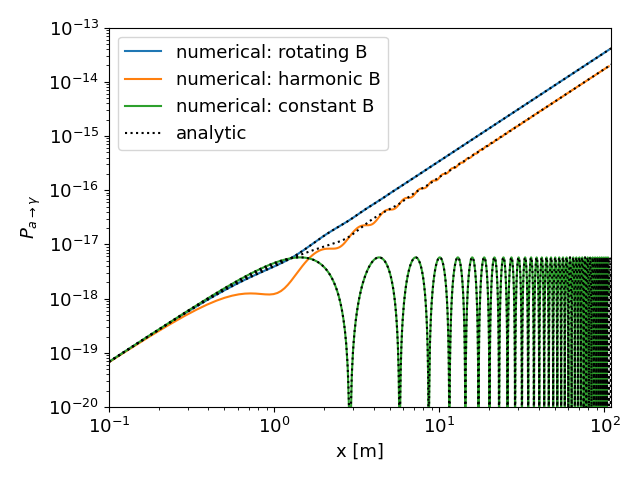

In [280]:
plt.subplots()

# numerical results
plt.plot(sol_helical_0.t/_m_eV_, (1.-np.abs(sol_helical_0.y[2])**2)/sol_helical_0._cB_rescale_factor_**2, label=r'numerical: rotating B')
plt.plot(sol_harmonic.t/_m_eV_, (1.-np.abs(sol_harmonic.y[2])**2)/sol_harmonic._cB_rescale_factor_**2, label=r'numerical: harmonic B')

# mask = np.where(sol_no_helical.t/_m_eV_<1.)
# plt.plot(sol_no_helical.t[mask]/_m_eV_, (1.-np.abs(sol_no_helical.y[2][mask])**2)/sol_no_helical._cB_rescale_factor_**2, label=r'numerical: constant B')
plt.plot(sol_no_helical.t/_m_eV_, (1.-np.abs(sol_no_helical.y[2])**2)/sol_no_helical._cB_rescale_factor_**2, label=r'numerical: constant B')

# get the wiggles 
#plt.vlines()

# compare with analytical results
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/np.sqrt(2), 0, omega, sol_helical_0.t), ':', label=r'helical B, analytic')
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/2, ma, omega, sol_helical_0.t, theta_dot), ':', label=r'harmonic B, analytic')
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB, ma, omega, sol_helical_0.t), ':', label=r'const. B, analytic')
x_arr = np.logspace(-3, 3, 50000)
plt.plot(x_arr*_m_eV_/_m_eV_, Pag(cB/np.sqrt(2), ma, omega, x_arr*_m_eV_, theta_dot), 'k:', label=r'analytic')
# plt.plot(x_arr*_m_eV_/_m_eV_, Pag(cB/2, ma, omega, x_arr*_m_eV_, theta_dot), 'k:') # harmonic
plt.plot(x_arr*_m_eV_/_m_eV_, Pag(cB/2, ma, omega, x_arr*_m_eV_, theta_dot)+
         Pag(cB/2, 0., omega, x_arr*_m_eV_, -theta_dot), 'k:') # harmonic
plt.plot(x_arr*_m_eV_/_m_eV_, Pag(cB, ma, omega, x_arr*_m_eV_, 0)/2., 'k:') # constant


# # analytical with varying B
# plt.plot(sol_harmonic.t/_m_eV_, 
#          Pag(cB*np.cos(-theta_dot*sol_harmonic.t/1.1), ma, omega, sol_harmonic.t), 
#          'k--', 
#          label=r'harmonic B, analytic w/ actual varying B')

# cB_arr = cB * np.cos(theta_dot*sol_harmonic.t)
# plt.plot(sol_harmonic.t/_m_eV_, 
#          Pag_harmo(cB_arr, ma, omega, sol_harmonic.t, method='cumsum'), 
#          'k--', 
#          label=r'harmonic B, analytic w/ actual varying B')

plt.legend()
plt.xlabel('x [m]')
plt.ylabel(r'$P_{a \rightarrow \gamma}$')
#plt.ylim(1e-10, 1)
#plt.xlim(1e4/_m_eV_, 1.5e7/_m_eV_)
# plt.xlim(1e-3, 110)
# plt.ylim(1e-24, 1e-14)
plt.xlim(1e-1, 110)
plt.ylim(1e-20, 1e-13)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
# plt.savefig('plots/num-vs-ana-10pct.pdf')
# plt.savefig('plots/num-vs-ana.pdf')
# plt.savefig('plots/num-vs-ana.png')

In [29]:
Pag(cB/np.sqrt(2), 0, omega, sol_helical_0.t, theta_dot)

array([0.00000000e+00, 2.34156372e-34, 2.45363978e-32, ...,
       2.88329864e-22, 2.86498207e-22, 2.85832330e-22])

<IPython.core.display.Javascript object>


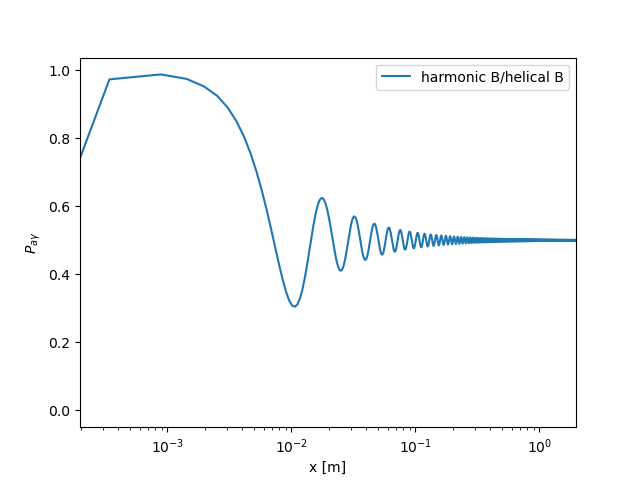

<ipython-input-30-5e7f742d383b>:8: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t_arr/_m_eV_, (1.-np.abs(sol_harmonic.sol(t_arr)[2])**2)/(1.-np.abs(sol_helical_0.sol(t_arr)[2])**2), label=r'harmonic B/helical B')


In [30]:
# verify the wiggles
plt.subplots()

# numerical results
# plt.plot(sol_helical_0.t/_m_eV_, (1.-np.abs(sol_helical_0.y[2])**2)/_cB_rescale_factor_**2, label=r'helical B')
# plt.plot(sol_no_helical.t/_m_eV_, (1.-np.abs(sol_no_helical.y[2])**2)/_cB_rescale_factor_**2, label=r'no helical')
t_arr = sol_harmonic.t
plt.plot(t_arr/_m_eV_, (1.-np.abs(sol_harmonic.sol(t_arr)[2])**2)/(1.-np.abs(sol_helical_0.sol(t_arr)[2])**2), label=r'harmonic B/helical B')


# # get the wiggles 
# for x in node_arr:
#     plt.vlines(x, 0., 1., linestyles='--', colors='k')

plt.legend()
plt.xlabel('x [m]')
plt.ylabel(r'$P_{a\gamma}$')
#plt.ylim(1e-10, 1)
plt.xlim(1e3/_m_eV_, 1e7/_m_eV_)
#plt.yscale('log')
plt.xscale('log')


In [31]:
# debug
# this is a quick demonstration to show that 
# the oscillation will be affected by the numerical artifact if precision is not chosen properly

In [32]:
# no helical numerical


xi=0
xe=100.
ma=1.
omega=1.
#cB=0.01
#cB=0.0001
cB=1e-5
# need precision to resolve the oscillations
theta_dot = 0.

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_no_helical = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='BDF',
                   # method='DOP853',vectorized=True,
                   rtol=1e-11,
                   atol=1e-11,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


<IPython.core.display.Javascript object>


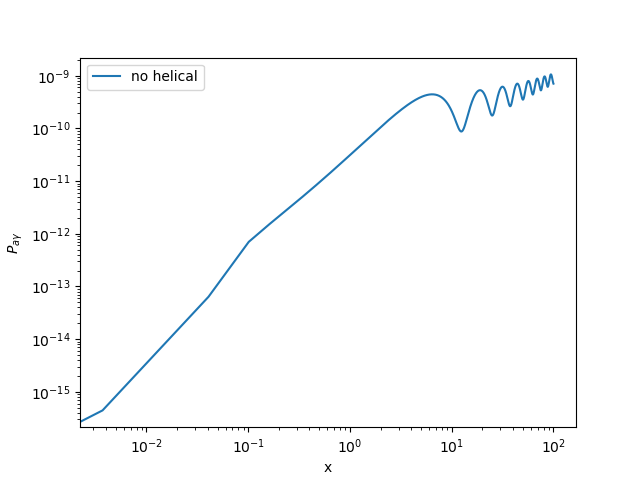

In [33]:
plt.subplots()

plt.plot(sol_no_helical.t, 1.-np.abs(sol_no_helical.y[2])**2, label=r'no helical')

plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{a\gamma}$')
#plt.ylim(1e-10, 1)
#plt.xlim(1e3, 1e9)
plt.yscale('log')
plt.xscale('log')

# Gaussian Noise

<IPython.core.display.Javascript object>


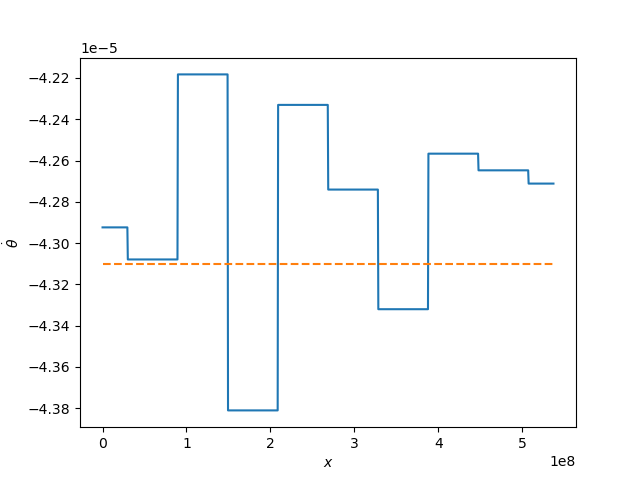

<IPython.core.display.Javascript object>


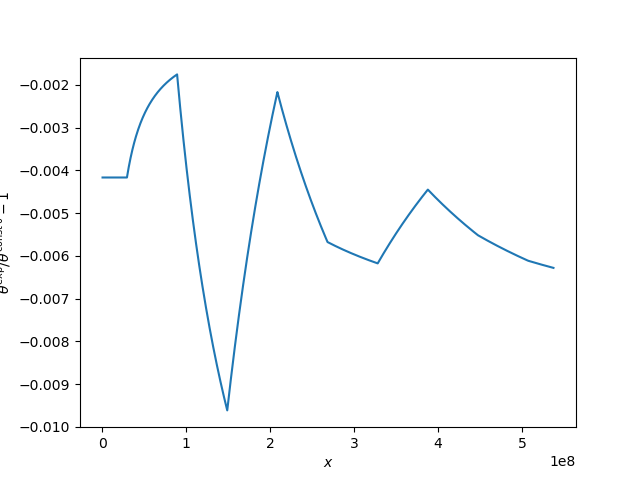

<ipython-input-110-159ee6126042>:43: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_fine_arr, theta_fine_arr/(theta_dot*x_fine_arr)-1.)
/home/chen/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


In [110]:
# factor of the cancellation
sigma = 0.01 # 1% fluctuation
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor


# helical numerical
_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
# xe=5. * _m_eV_ /_eV_over_unit_ #[1/eV]
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-2*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * 1.000001



np.random.seed(2) 
num_of_domains = 10 # noise frequency, TODO: later change it to gaussian as well
# dtheta_arr = (theta_dot*(1.+ba.get_theta_gaussian(num_of_domain, sigma=sigma)))
dtheta_arr = ba.get_dtheta_gaussian(num_of_domains, sigma, bg=theta_dot)
x_arr = np.linspace(xi, xe, num_of_domains)

x_fine_arr = np.linspace(xi, xe, num_of_domains*100)
dtheta_fine_arr = interp1d(x_arr, dtheta_arr, kind='nearest')(x_fine_arr)

theta_fine_arr = ba.integrate_theta(x_fine_arr, dtheta_fine_arr)


plt.subplots()
plt.plot(x_fine_arr, dtheta_fine_arr)
plt.plot(x_arr, theta_dot*np.array([1]*len(x_arr)), '--')
plt.ylabel(r'$\dot\theta$')
plt.xlabel(r'$x$')

plt.subplots()
# plt.plot(x_fine_arr, theta_fine_arr)
# plt.plot(x_fine_arr, theta_dot*x_fine_arr, '--')
plt.plot(x_fine_arr, theta_fine_arr/(theta_dot*x_fine_arr)-1.)
# plt.ylabel(r'$\dot\theta$')
plt.ylabel(r'$\theta^{\rm exp}/\theta^{\rm const \,\dot\theta} -1$')
plt.xlabel(r'$x$')


def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

# def theta_fn(x):
#     return theta_dot * x

theta_fn = interp1d(x_fine_arr, theta_fine_arr)

sol_helical_gaussian_1 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',vectorized=True,
                   #rtol=1e-8,
                   rtol=1e-15,
                   #atol=1e-8,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)
sol_helical_gaussian_1._cB_rescale_factor_ = _cB_rescale_factor_

<IPython.core.display.Javascript object>


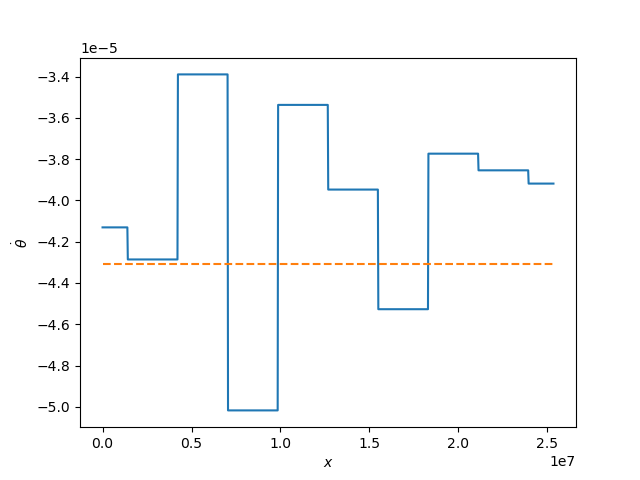

<IPython.core.display.Javascript object>


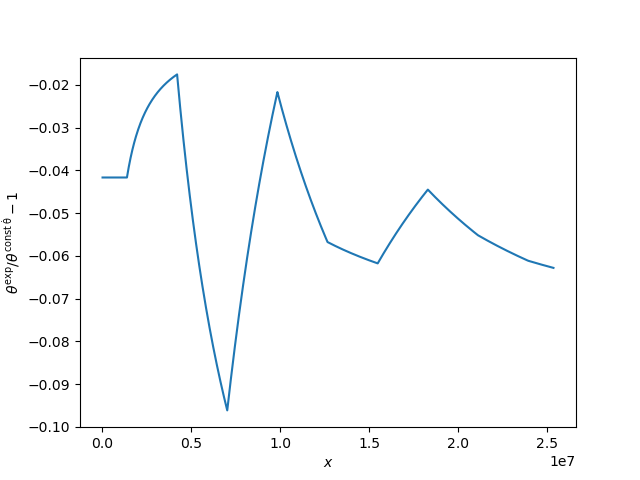

<ipython-input-65-9659ba28455d>:42: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_fine_arr, theta_fine_arr/(theta_dot*x_fine_arr)-1.)
/home/chen/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


In [65]:
# factor of the cancellation
sigma = 0.1 # 10% fluctuation
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

# helical numerical

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
xe=5. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-2*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * 1.000001



np.random.seed(2) 
num_of_domains = 10 # noise frequency, TODO: later change it to gaussian as well
# dtheta_arr = (theta_dot*(1.+ba.get_theta_gaussian(num_of_domain, sigma=sigma)))
dtheta_arr = ba.get_dtheta_gaussian(num_of_domains, sigma, bg=theta_dot)
x_arr = np.linspace(xi, xe, num_of_domains)

x_fine_arr = np.linspace(xi, xe, num_of_domains*100)
dtheta_fine_arr = interp1d(x_arr, dtheta_arr, kind='nearest')(x_fine_arr)

theta_fine_arr = ba.integrate_theta(x_fine_arr, dtheta_fine_arr)


plt.subplots()
plt.plot(x_fine_arr, dtheta_fine_arr)
plt.plot(x_arr, theta_dot*np.array([1]*len(x_arr)), '--')
plt.ylabel(r'$\dot\theta$')
plt.xlabel(r'$x$')

plt.subplots()
# plt.plot(x_fine_arr, theta_fine_arr)
# plt.plot(x_fine_arr, theta_dot*x_fine_arr, '--')
plt.plot(x_fine_arr, theta_fine_arr/(theta_dot*x_fine_arr)-1.)
# plt.ylabel(r'$\dot\theta$')
plt.ylabel(r'$\theta^{\rm exp}/\theta^{\rm const \,\dot\theta} -1$')
plt.xlabel(r'$x$')


def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

# def theta_fn(x):
#     return theta_dot * x

theta_fn = interp1d(x_fine_arr, theta_fine_arr)

sol_helical_gaussian_10 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',vectorized=True,
                   #rtol=1e-8,
                   rtol=1e-15,
                   #atol=1e-8,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)

sol_helical_gaussian_10._cB_rescale_factor_ = _cB_rescale_factor_

<IPython.core.display.Javascript object>


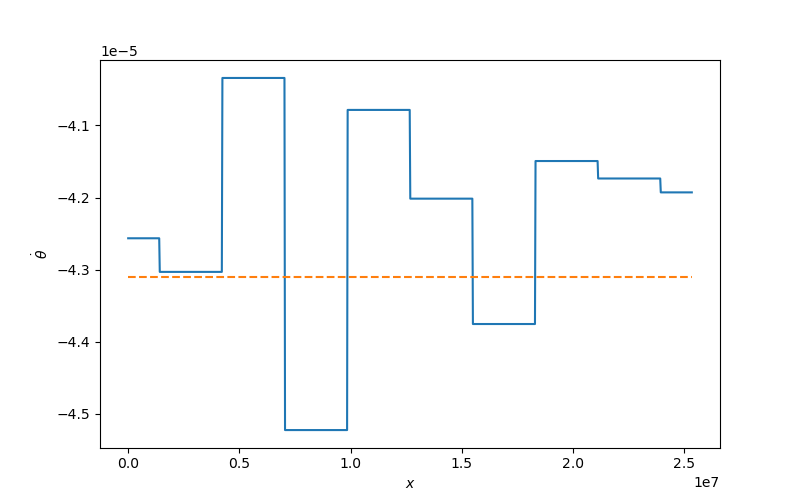

<IPython.core.display.Javascript object>


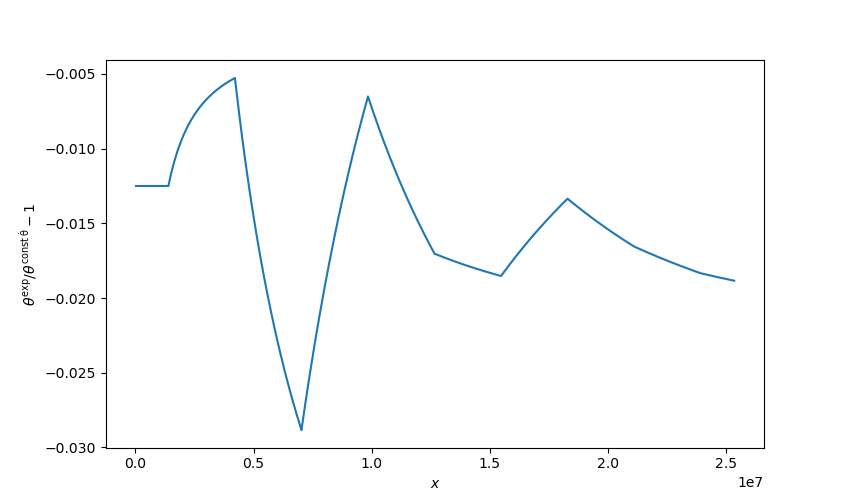

<ipython-input-90-d1a7e3b51f48>:42: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_fine_arr, theta_fine_arr/(theta_dot*x_fine_arr)-1.)
/home/chen/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


In [90]:
# factor of the cancellation
sigma = 0.03 # 3% fluctuation
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

# helical numerical
_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
xe=5. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-2*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * 1.000001



np.random.seed(2) 
num_of_domains = 10 # noise frequency, TODO: later change it to gaussian as well
# dtheta_arr = (theta_dot*(1.+ba.get_theta_gaussian(num_of_domain, sigma=sigma)))
dtheta_arr = ba.get_dtheta_gaussian(num_of_domains, sigma, bg=theta_dot)
x_arr = np.linspace(xi, xe, num_of_domains)

x_fine_arr = np.linspace(xi, xe, num_of_domains*100)
dtheta_fine_arr = interp1d(x_arr, dtheta_arr, kind='nearest')(x_fine_arr)

theta_fine_arr = ba.integrate_theta(x_fine_arr, dtheta_fine_arr)


plt.subplots()
plt.plot(x_fine_arr, dtheta_fine_arr)
plt.plot(x_arr, theta_dot*np.array([1]*len(x_arr)), '--')
plt.ylabel(r'$\dot\theta$')
plt.xlabel(r'$x$')

plt.subplots()
# plt.plot(x_fine_arr, theta_fine_arr)
# plt.plot(x_fine_arr, theta_dot*x_fine_arr, '--')
plt.plot(x_fine_arr, theta_fine_arr/(theta_dot*x_fine_arr)-1.)
# plt.ylabel(r'$\dot\theta$')
plt.ylabel(r'$\theta^{\rm exp}/\theta^{\rm const \,\dot\theta} -1$')
plt.xlabel(r'$x$')


def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

# def theta_fn(x):
#     return theta_dot * x

theta_fn = interp1d(x_fine_arr, theta_fine_arr)

sol_helical_gaussian_3 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',vectorized=True,
                   #rtol=1e-8,
                   rtol=1e-15,
                   #atol=1e-8,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)
sol_helical_gaussian_3._cB_rescale_factor_ = _cB_rescale_factor_

In [60]:
len(sol_harmonic.t)

9194

In [59]:
len(sol_helical_gaussian_1.t)

9194

In [61]:
len(sol_harmonic.t)

9194

In [39]:
len(sol_no_helical.t)

1656

<IPython.core.display.Javascript object>


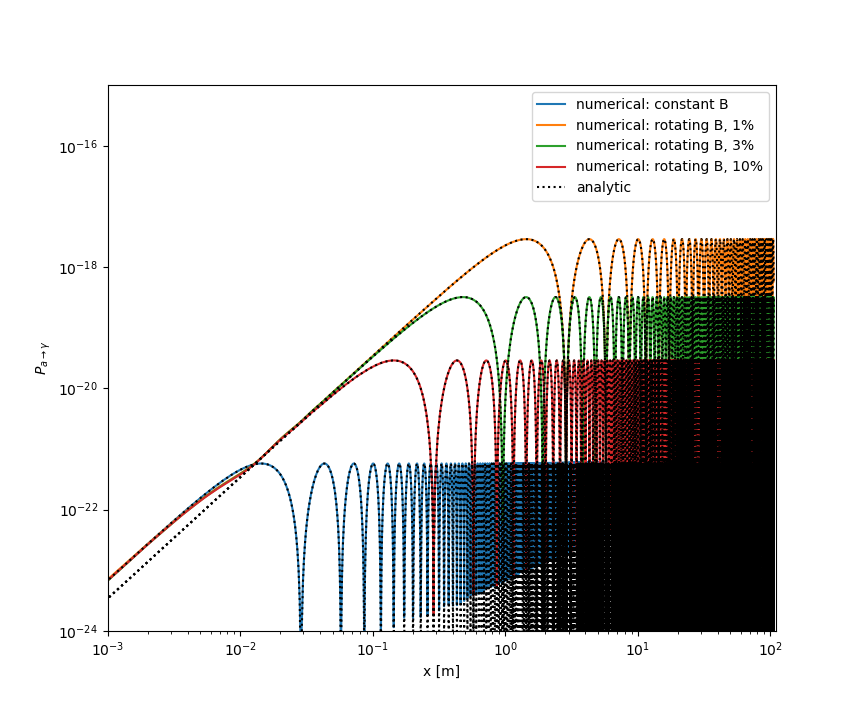

In [217]:
plt.subplots()

# numerical results
plt.plot(sol_no_helical.t/_m_eV_, (1.-np.abs(sol_no_helical.y[2])**2)/sol_no_helical._cB_rescale_factor_**2, label=r'numerical: constant B')
# plt.plot(sol_helical_001.t/_m_eV_, (1.-np.abs(sol_helical_001.y[2])**2)/sol_helical_001._cB_rescale_factor_**2, label=r'numerical: rotating B, 1%')
plt.plot(sol_helical_001_tmp.t/_m_eV_, (1.-np.abs(sol_helical_001_tmp.y[2])**2)/sol_helical_001._cB_rescale_factor_**2, label=r'numerical: rotating B, 1%')
plt.plot(sol_helical_003.t/_m_eV_, (1.-np.abs(sol_helical_003.y[2])**2)/sol_helical_003._cB_rescale_factor_**2, label=r'numerical: rotating B, 3%')
plt.plot(sol_helical_10.t/_m_eV_, (1.-np.abs(sol_helical_10.y[2])**2)/sol_helical_10._cB_rescale_factor_**2, label=r'numerical: rotating B, 10%')
# plt.plot(sol_harmonic.t/_m_eV_, (1.-np.abs(sol_harmonic.y[2])**2)/_cB_rescale_factor_**2, label=r'numerical: harmonic B, 10%')


# Gaussian realization
# plt.plot(sol_helical_gaussian_1.t/_m_eV_, (1.-np.abs(sol_helical_gaussian_1.y[2])**2)/sol_helical_gaussian_1._cB_rescale_factor_**2, label=r'numerical: rotating B 1% Gaussian')
# plt.plot(sol_helical_gaussian_10.t/_m_eV_, (1.-np.abs(sol_helical_gaussian_10.y[2])**2)/_cB_rescale_factor_**2, label=r'numerical: rotating B 10% Gaussian')

# get the wiggles 
#plt.vlines()

# compare with analytical results
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/np.sqrt(2), 0, omega, sol_helical_0.t), ':', label=r'helical B, analytic')
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/2, ma, omega, sol_helical_0.t, theta_dot), ':', label=r'harmonic B, analytic')
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB, ma, omega, sol_helical_0.t), ':', label=r'const. B, analytic')

theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * 1.1
plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/np.sqrt(2), ma, omega, sol_helical_0.t, theta_dot), 'k:', label=r'analytic')
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/2, ma, omega, sol_helical_0.t, theta_dot), 'k:') # harmonic

theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * 1.03
plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/np.sqrt(2), ma, omega, sol_helical_0.t, theta_dot), 'k:')
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/2, ma, omega, sol_helical_0.t, theta_dot)) # harmonic

theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * 1.01
plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/np.sqrt(2), ma, omega, sol_helical_0.t, theta_dot), 'k:')
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/2, ma, omega, sol_helical_0.t, theta_dot)) # harmonic

plt.plot(sol_helical_0.t/_m_eV_, Pag(cB, ma, omega, sol_helical_0.t, 0), 'k:') # constant


# # analytical with varying B
# plt.plot(sol_harmonic.t/_m_eV_, 
#          Pag(cB*np.cos(-theta_dot*sol_harmonic.t/1.1), ma, omega, sol_harmonic.t), 
#          'k--', 
#          label=r'harmonic B, analytic w/ actual varying B')

# cB_arr = cB * np.cos(theta_dot*sol_harmonic.t)
# plt.plot(sol_harmonic.t/_m_eV_, 
#          Pag_harmo(cB_arr, ma, omega, sol_harmonic.t, method='cumsum'), 
#          'k--', 
#          label=r'harmonic B, analytic w/ actual varying B')

plt.legend()
plt.xlabel('x [m]')
plt.ylabel(r'$P_{a \rightarrow \gamma}$')
#plt.ylim(1e-10, 1)
#plt.xlim(1e4/_m_eV_, 1.5e7/_m_eV_)
# plt.xlim(1e-3, 2)
# plt.xlim(1e-3, 3)
# plt.ylim(1e-24, 1e-17)
plt.xlim(1e-3, 110)
plt.ylim(1e-24, 1e-15)
plt.yscale('log')
plt.xscale('log')
# plt.savefig('plots/num-vs-ana-10pct.pdf')
# plt.savefig('plots/num-vs-ana.pdf')

In [ ]:
# Gaussian band

In [ ]:
# run the gaussian pulling ~O(100) times plot them all

In [237]:
# def get_one_curve(seed=None):
#     # factor of the cancellation
#     sigma = 0.01 # 1% fluctuation
    
#     # helical numerical

#     _m_eV_ = 5067730.58270578
#     _G_over_GeV2_ = 1.95352783207652e-20
#     _GeV_over_eV_ = 1.e9
#     _eV_over_unit_ = 1.
    

#     xi=0. * _m_eV_ /_eV_over_unit_
#     xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
#     ma=1e-2*_eV_over_unit_ #[eV]
#     omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
#     cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
#     theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * 1.000001

#     # note this factor is to combat the numerical precision floor    
#     # 1/50 is to make sure no NL regime is introduced by cB
#     _cB_rescale_factor_ = np.abs(theta_dot*sigma/(cB)/50.) 

#     # determine the tolerance
#     # make sure it's 2 orders of mag smaller than the first peak
#     amplitude = (cB*_cB_rescale_factor_)**2/(sigma*theta_dot)**2
#     tolerance = amplitude/100



#     if seed is not None:
#         np.random.seed(seed) 
#     num_of_domains = 10 # noise frequency, TODO: later change it to gaussian as well
#     # dtheta_arr = (theta_dot*(1.+ba.get_theta_gaussian(num_of_domain, sigma=sigma)))
#     dtheta_arr = ba.get_dtheta_gaussian(num_of_domains, sigma, bg=theta_dot)
#     x_arr = np.linspace(xi, xe, num_of_domains)

#     x_fine_arr = np.linspace(xi, xe, num_of_domains*100)
#     dtheta_fine_arr = interp1d(x_arr, dtheta_arr, kind='nearest')(x_fine_arr)

#     theta_fine_arr = ba.integrate_theta(x_fine_arr, dtheta_fine_arr)



#     def mg2_over_om_fn(x): 
#         x, is_scalar = ba.treat_as_arr(x)
#         res = (x)*0.
#         if is_scalar:
#             res = np.squeeze(res)
#         return res

#     # def theta_fn(x):
#     #     return theta_dot * x

#     theta_fn = interp1d(x_fine_arr, theta_fine_arr)

#     sol_helical_gaussian = solve_ivp(ba.derivs,
#                [xi, xe],
#                [0.+0.j, 0.+0.j, 1.+0.j],     
#                # method='RK45',
#                method='DOP853',vectorized=True,
#                #rtol=1e-8,
#                #rtol=1e-10,
#                #atol=1e-8,
#                #atol=1e-10,
#                rtol=tolerance,
#                atol=tolerance,
#                args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
#             dense_output=True)

#     # output
#     sol_helical_gaussian._cB_rescale_factor_ = _cB_rescale_factor_
#     sol_helical_gaussian.tolerance = tolerance
    
#     return sol_helical_gaussian

In [273]:
sol = ba.get_psurv(sigma=0.01, seed='constant')

KeyboardInterrupt: 

In [276]:
sol = ba.get_psurv(sigma=0.01, seed=6)

1.4744905773185355e-07
1.9274144580038154e-08
1.9274144580038154e-08
1.9274144580038154e-08


In [277]:
print(sol._cB_rescale_factor_)
print(sol.tolerance)

89899.0594700372
1.9274144580038154e-10


In [77]:
# %timeit get_one_curve()
# 3.43 s ± 203 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [133]:
# %timeit get_one_curve()
# # 3.43 s ± 203 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

1.46 s ± 9.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
import time

# t0 = time.time()
# print('abc')
# t1 = time.time()

# total = t1-t0
# print(total)

abc
0.00010991096496582031


In [158]:
14*100*8/60/24

7.777777777777778

In [167]:
t0 = time.time()
sol0 = ba.get_psurv(ma=10**(-4.5), 
                    sigma=0.03*10., 
                    ga=1e-11, 
                    theta_dot_mean=1., 
                    num_of_domains=2000, 
                    wavelength=1064/10.)
t1 = time.time()
print('used %e s' %(t1-t0))

(cB*_cB_rescale_factor_)**2/k**2 2075.090756471408
dtheta_arr [-5.42113384e-11 -5.06473730e-11 -3.49397235e-11 ... -3.51151302e-11
 -4.82990871e-11 -3.47354861e-11]
theta_dot=-4.290874e-11
dtheta_fn(x) -3.473548607567952e-11
mass_phase -4.2908692616765773e-11
ma2_over_om=-4.290869e-11
cB=1.035370e-17
k=8.173207e-12
ma=3.162278e-05
_cB_rescale_factor_: 3.595966e+07
tolerance:  1.0000000000000001e-11
used 4.040542e-01 s


In [123]:
t0 = time.time()
sol1 = ba.get_psurv(sigma=0.03*80,
                    ga=1e-11,
                    theta_dot_mean=1.,
                    num_of_domains=10,
                    wavelength=1064/80.)
t1 = time.time()
print('used %e s' %(t1-t0))

(cB*_cB_rescale_factor_)**2/k**2 1.1280608860926823e-07
dtheta_arr [ 3.38880161e-07 -1.65899224e-06 -9.47464914e-07 -3.62154666e-07
 -3.34991222e-08  9.42933832e-07 -1.60931314e-06 -5.27708598e-07
 -1.82158750e-06 -1.64488177e-06]
theta_dot=-5.363592e-07
dtheta_fn(x) -1.6448817672491685e-06
mass_phase -5.363586577095722e-07
ma2_over_om=-5.363587e-07
cB=1.035370e-17
k=-1.108523e-06
ma=1.000000e-02
_cB_rescale_factor_: 3.595966e+07
tolerance:  6.334523316763164e-13
used 6.949389e-01 s


In [287]:
t0 = time.time()
ma = 10**-4.
ga = 10**-11
wavelength = 1064
imperfect = 0.10

sol0 = ba.get_psurv(sigma=0.00003, 
                    ma=ma,
                    ga=ga,
                    theta_dot_mean=1.+imperfect,
                    num_of_domains=5000,
                    wavelength=wavelength)
t1 = time.time()
print('used %e s' %(t1-t0))

(cB*_cB_rescale_factor_)**2/k**2 0.7527688981021999
dtheta_arr [-4.72012744e-09 -4.72003479e-09 -4.71978428e-09 ... -4.72007100e-09
 -4.71968856e-09 -4.71999068e-09]
theta_dot=-4.719961e-09
dtheta_fn(x) -4.71999067666414e-09
mass_phase -4.290869261676577e-09
ma2_over_om=-4.290869e-09
cB=1.035370e-17
k=-4.291214e-10
ma=1.000000e-04
_cB_rescale_factor_: 3.595966e+07
tolerance:  1.0000000000000001e-11
used 1.384580e-01 s


<IPython.core.display.Javascript object>


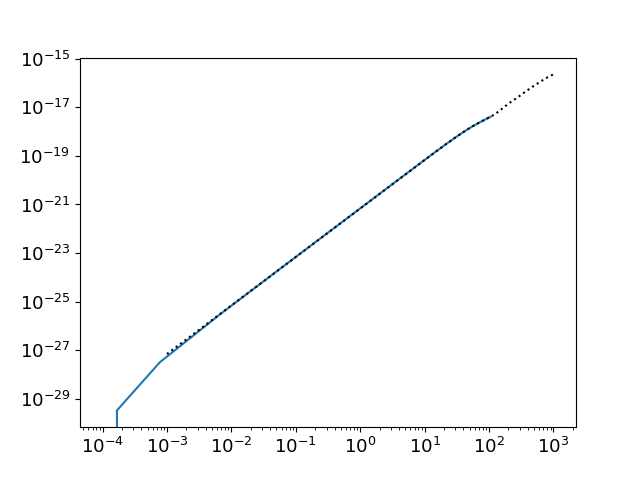

In [288]:
plt.subplots()
plt.plot(sol0.t/ba._m_eV_, (1-np.abs(sol0.y[2])**2)/sol0._cB_rescale_factor_**2)
# plt.plot(sol1.t/ba._m_eV_, (1-np.abs(sol1.y[2])**2)/sol1._cB_rescale_factor_**2)


x_arr = np.logspace(-3, 3, 5000)
# cB = 1.035370e-17
# cB = 1.035370e-18
ma = ma
cB = ga*53000*ba._G_over_GeV2_*ba._GeV_over_eV_ #[eV]
omega = 2.*np.pi/wavelength*ba._one_over_nm_eV_
theta_dot = -ma**2/2./omega*(1. + imperfect)
# plt.plot(x_arr, Pag(cB/np.sqrt(2), ma, omega, x_arr*ba._m_eV_, theta_dot)
#          + Pag(cB/np.sqrt(2), ma, omega, x_arr*ba._m_eV_, -theta_dot)
#          ,'k:', label=r'analytic')
plt.plot(x_arr, Pag(cB/np.sqrt(2), ma, omega, x_arr*ba._m_eV_, theta_dot),'k:', label=r'analytic')
# plt.plot(x_arr, Pag(cB/2, ma, omega, x_arr*ba._m_eV_, theta_dot), 'k:') # harmonic
# plt.plot(x_arr, Pag(cB, ma, omega, x_arr*ba._m_eV_, 0), 'k:') # constant

# plt.xlim(1e-2, 110)
plt.xscale('log')
plt.yscale('log')

In [ ]:
sol_gaussian_arr = []

In [154]:
# np.random.seed(None)
a = np.random.get_state()

In [155]:
b = np.random.get_state()

In [ ]:
for _ in range(100):
        sol_gaussian_arr.append(ba.get_psurv(sigma=0.5, theta_dot_mean=1., num_of_domains=10, wavelength=1064/50.))

In [451]:
sol_gaussian_arr2 = []

In [453]:
for _ in range(100):
    #sol_gaussian_arr.append(ba.get_psurv())
    sol_gaussian_arr2.append(ba.get_psurv(sigma=0.5, theta_dot_mean=1., num_of_domains=5000, wavelength=1064/50.))

_cB_rescale_factor_:  359596.2378801488
tolerance:  4.246959968641512e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  5.312738506970173e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  5.491900669406124e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  5.427594322867003e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  5.554000356611191e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  6.015179337544952e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  5.707781424164562e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  5.475988840357294e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  5.229352677752103e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  4.3640984009480163e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  4.317756967219986e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  5.414218098499734e-13
_cB_rescale_factor_:  359596.2378801488
tolerance:  4.742629135674394e-13
_cB_rescale_factor_:  359596.23788014

KeyboardInterrupt: 

In [439]:
# another trick: make omega 50 times bigger, delta 50 times smaller
# this is because it helps avoid two big number cancels each other in the ODE

# sol_helical_tmp = ba.get_psurv(sigma=0.0001, theta_dot_mean=2., num_of_domains=10, wavelength=1064/100.)
sol_helical_tmp = ba.get_psurv(sigma=0.0001, theta_dot_mean=1.5, num_of_domains=100, wavelength=1064/50.)
# sol_helical_tmp = ba.get_psurv(sigma=0.0001, theta_dot_mean=1.01, num_of_domains=10, wavelength=1064.)
# sol_helical_tmp = ba.get_psurv(sigma=0.0001, theta_dot_mean=0.1, num_of_domains=10, wavelength=10.64)
# sol_helical_tmp = ba.get_psurv(sigma=0.1, theta_dot_mean=1.)

_cB_rescale_factor_:  359596.2378801488
tolerance:  7.520866355369098e-12


In [668]:
len(sol_gaussian_arr)

113

In [669]:
len(sol_gaussian_arr2)

90

<IPython.core.display.Javascript object>


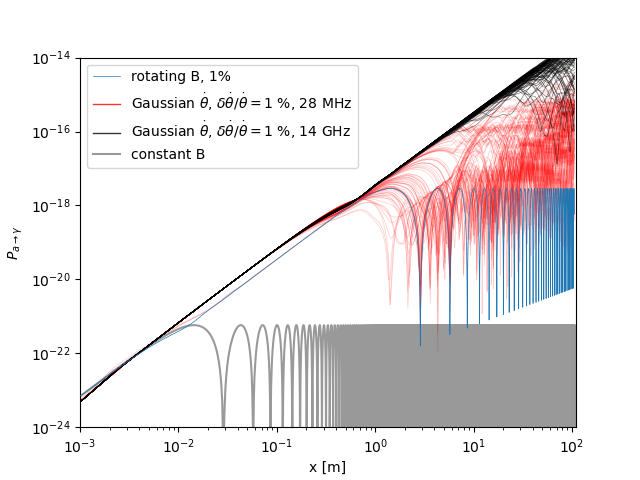

In [702]:
plt.subplots()

# numerical results
plt.plot(sol_helical_001.t/_m_eV_, (1.-np.abs(sol_helical_001.y[2])**2)/sol_helical_001._cB_rescale_factor_**2, label=r'rotating B, 1%', linewidth=0.5, alpha=1., zorder=10000)
# plt.plot(sol_helical_003.t/_m_eV_, (1.-np.abs(sol_helical_003.y[2])**2)/sol_helical_003._cB_rescale_factor_**2, label=r'rotating B, 3%', alpha=0.4)
# plt.plot(sol_helical_10.t/_m_eV_, (1.-np.abs(sol_helical_10.y[2])**2)/sol_helical_10._cB_rescale_factor_**2, label=r'rotating B, 10%', alpha=0.4)
# plt.plot(sol_helical_tmp.t/_m_eV_, (1.-np.abs(sol_helical_tmp.y[2])**2)/sol_helical_tmp._cB_rescale_factor_**2, '--', label=r'rotating B, test', alpha=0.6)


for sol in sol_gaussian_arr[:90]:
    plt.plot(sol.t/_m_eV_, (1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 'r', alpha=0.2, linewidth=0.5)
    
# labeling
sol = sol_gaussian_arr[-1]
plt.plot(1e100*sol.t/_m_eV_, (1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 
         'r', alpha=0.8, linewidth=1., label=r"Gaussian $\dot\theta$, $\delta \dot\theta/\dot\theta=1$ %, 28 MHz")    

for sol in sol_gaussian_arr2[:90]:
    plt.plot(sol.t/_m_eV_, (1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 'k', alpha=0.5, linewidth=0.5)

# labeling
sol = sol_gaussian_arr2[-1]
plt.plot(1e100*sol.t/_m_eV_, (1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 
         'k', alpha=0.8, linewidth=1., label=r"Gaussian $\dot\theta$, $\delta \dot\theta/\dot\theta=1$ %, 14 GHz")    

# compare with analytical results
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/np.sqrt(2), ma, omega, sol_helical_0.t, theta_dot), 'k:', label=r'analytic')
# plt.plot(sol_helical_0.t/_m_eV_, Pag(cB/2, ma, omega, sol_helical_0.t, theta_dot), 'k:') # harmonic
plt.plot(sol_helical_0.t/_m_eV_, Pag(1e-9*53000*_G_over_GeV2_*_GeV_over_eV_, 0.01, 1.16, sol_helical_0.t, 0), 'k-', alpha=0.4, label='constant B') # constant


plt.legend()
plt.xlabel('x [m]')
plt.ylabel(r'$P_{a \rightarrow \gamma}$')
plt.xlim(1e-3, 110)
plt.ylim(1e-24, 1e-14)
plt.yscale('log')
plt.xscale('log')
# plt.savefig('plots/num-vs-ana-10pct.pdf')
# plt.savefig('plots/num-vs-ana.pdf')
# plt.savefig('plots/gaussian-1pct.pdf')
# plt.savefig('plots/gaussian-1pct.png')

In [717]:
# get the 1sigma error bar

psurv_low_freq_arr = []
for sol in sol_gaussian_arr:
    psurv_low_freq_arr.append(((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1])
mean_log_low = np.mean(np.log10(psurv_low_freq_arr))
sigma_log_low = np.std(np.log10(psurv_low_freq_arr))

psurv_high_freq_arr = []
for sol in sol_gaussian_arr2:
    psurv_high_freq_arr.append(((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1])
mean_log_high = np.mean(np.log10(psurv_high_freq_arr))
sigma_log_high = np.std(np.log10(psurv_high_freq_arr))
    

<IPython.core.display.Javascript object>


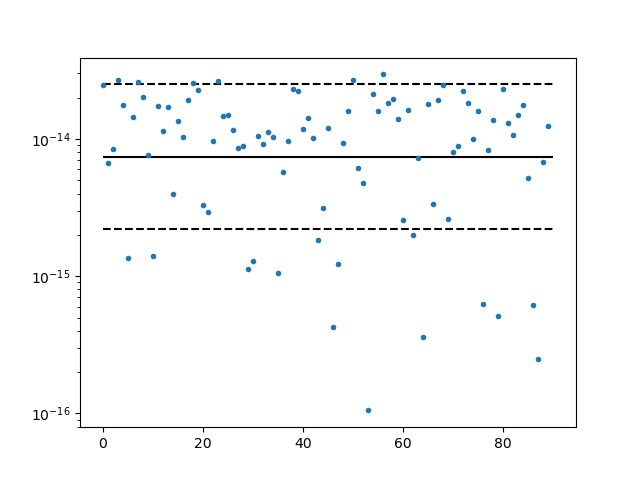

In [721]:
plt.subplots()
plt.plot(psurv_high_freq_arr, '.')

plt.hlines(10**(mean_log_high), 0, len(psurv_high_freq_arr), colors='k', linestyles='-')
plt.hlines(10**(mean_log_high+sigma_log_high), 0, len(psurv_high_freq_arr), colors='k', linestyles='--')
plt.hlines(10**(mean_log_high-sigma_log_high), 0, len(psurv_high_freq_arr), colors='k', linestyles='--')

plt.yscale('log')


<IPython.core.display.Javascript object>


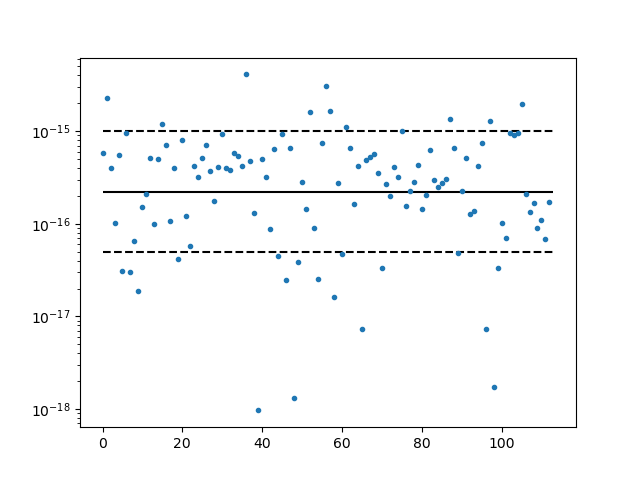

In [720]:
plt.subplots()
plt.plot(psurv_low_freq_arr, '.')
# plt.hlines(mean_low, 0, len(psurv_low_freq_arr), colors='k', linestyles='-')
# plt.hlines(mean_low+sigma_low, 0, len(psurv_low_freq_arr), colors='k', linestyles='--')
# plt.hlines(mean_low-sigma_low, 0, len(psurv_low_freq_arr), colors='k', linestyles='--')

plt.hlines(10**(mean_log_low), 0, len(psurv_low_freq_arr), colors='k', linestyles='-')
plt.hlines(10**(mean_log_low+sigma_log_low), 0, len(psurv_low_freq_arr), colors='k', linestyles='--')
plt.hlines(10**(mean_log_low-sigma_log_low), 0, len(psurv_low_freq_arr), colors='k', linestyles='--')

plt.yscale('log')


In [ ]:
# TODO: check the numerical precision of the Gaussian noise

In [723]:
# do a scan with the cluster

# input: ma grid

# output: 
#    mean Psurv and 1sigma error, 
#    full solution pickled,
#    random seed

# cross check: change precision and see how much it changes

In [188]:
# production run
import scan as sc
param = sc.Param()

param.ga = 1.e-9
param.xi = 0.
param.xe = 106.
param.B = 5.6
param.num_of_domains = 10
param.theta_dot_mean = 1.0001

sc.set_param(param, wavelength=1064.)
sc.set_param(param, sigma=0.01)

In [191]:
sc.set_param(param,ma=1e-4)

In [196]:
sol_helical_tmp = ba.get_psurv(ma=1e-4, 
                               sigma=0.0001, 
                               theta_dot_mean=1.,
                               num_of_domains=100, 
                               wavelength=1064)

ma2_over_om=-4.290869e-09
cB=3.723151e-10
k=9.998958e-01
ma=1.000000e-04
_cB_rescale_factor_:  359596.2378801488
tolerance:  1.3855771113992216e-24


KeyboardInterrupt: 

In [192]:
sc.get_sol(param)

KeyboardInterrupt: 

# ma-ga contour

#### no noise

In [7]:
# from the flat part of ALPS II
ga_ref_ALPSII = 1.897378608795087830e-11 # GeV**-1
B_ref = 5.3 # Tesla
x_ref = 106 # meter
psurv_ALPSII = 1./4* (ga_ref_ALPSII* B_ref *x_ref * ba._G_over_GeV2_*ba._Tesla_over_Gauss_*ba._m_eV_*ba._GeV_over_eV_ )**2
print(psurv_ALPSII)

2.784054425617672e-17


In [413]:
# reproduce ALPS II with constant B

# ma0_arr = np.logspace(-5, -3.+np.log10(2), 800)
ma0_arr = np.linspace(1e-5, 2e-3, 400)
sol_constB_arr = []
ga_ref = 1e-9
N = 10 # doesn't matter
wavelength=1064

# append the specific ma that matches
omega_ref = 2.*np.pi/wavelength*ba._one_over_nm_eV_ # [eV]
theta_dot_ref = 0.


for ma in tqdm(ma0_arr):
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.00001, 
        
        theta_dot_mean=theta_dot_ref,
        #theta_dot_mean=1., 
        num_of_domains=N,
        wavelength=wavelength,
        verbose=False)
    sol_constB_arr.append(sol)

100%|██████████| 400/400 [09:17<00:00,  1.39s/it]


In [414]:
ga_constB_arr = []
for sol in sol_constB_arr:
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    # print(psurv)
    ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    ga_constB_arr.append(ga)

In [591]:
# benchmark 1: fixed ma

In [87]:
10**(-3.3)

0.0005011872336272725

In [211]:
ma_ref = 10**(-3.3)
ma1_arr = np.logspace(np.log10(ma_ref/3.), np.log10(ma_ref*3.), 200)
sol_ma1_arr = []
ga_ref = 1e-9
N = 10
wavelength=1064

# append the specific ma that matches
ma1_arr = np.sort(np.concatenate((ma1_arr, [ma_ref])))
omega_ref = 2.*np.pi/wavelength*ba._one_over_nm_eV_ # [eV]
theta_dot = -ma_ref**2/2/omega_ref


for ma in tqdm(ma1_arr):
    theta_dot_mean = theta_dot/(-ma**2/2/omega_ref)
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.00001, 
        #theta_dot=theta_dot_ref,
        theta_dot_mean=theta_dot_mean, 
        num_of_domains=N,
        wavelength=wavelength,
        verbose=False)
    sol_ma1_arr.append(sol)
    
ga_ma1_arr = []
for sol in sol_ma1_arr:
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    # print(psurv)
    psurv = psurv/np.sqrt(2)
    ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    ga_ma1_arr.append(ga)

100%|██████████| 201/201 [00:44<00:00,  4.50it/s]


In [212]:
# # production

# ma_ref = 10**(-3.3)
# ma1_arr = np.logspace(np.log10(ma_ref/3.), np.log10(ma_ref*3.), 200)
# sol_ma1_arr = []
# ga_ref = 1e-9
# N = 10
# wavelength=1064

# # append the specific ma that matches
# ma1_arr = np.sort(np.concatenate((ma1_arr, [ma_ref])))
# omega_ref = 2.*np.pi/wavelength*ba._one_over_nm_eV_ # [eV]
# theta_dot = -ma_ref**2/2/omega_ref


# for ma in tqdm(ma1_arr):
#     theta_dot_mean = theta_dot/(-ma**2/2/omega_ref)
#     sol = ba.get_psurv(
#         ma=ma,
#         ga=ga_ref,
#         sigma=0.00001, 
#         #theta_dot=theta_dot_ref,
#         theta_dot_mean=theta_dot_mean, 
#         num_of_domains=N,
#         wavelength=wavelength,
#         verbose=False)
#     sol_ma1_arr.append(sol)
    
# ga_ma1_arr = []
# for sol in sol_ma1_arr:
#     psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
#     # print(psurv)
#     ga = ga_ref / (psurv/psurv_ALPSII)**0.5
#     ga_ma1_arr.append(ga)

In [90]:
# benchmark 2

In [91]:
10**(-3.3)*2.

0.001002374467254545

In [213]:
ma_ref = 10**(-3.3)*2.
ma2_arr = np.logspace(np.log10(ma_ref/2.), np.log10(ma_ref*2.), 100)
sol_ma2_arr = []
ga_ref = 1e-9
N = 10
wavelength=1064

# append the specific ma that matches
ma2_arr = np.sort(np.concatenate((ma2_arr, [ma_ref])))
omega_ref = 2.*np.pi/wavelength*ba._one_over_nm_eV_ # [eV]
theta_dot = -ma_ref**2/2/omega_ref


for ma in tqdm(ma2_arr):
    theta_dot_mean = theta_dot/(-ma**2/2/omega_ref)
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.00001, 
        # theta_dot_mean=theta_dot_ref,
        theta_dot_mean=theta_dot_mean, 
        num_of_domains=N,
        wavelength=wavelength,
        verbose=False)
    sol_ma2_arr.append(sol)
    
ga_ma2_arr = []
for sol in sol_ma2_arr:
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    # print(psurv)
    psurv = psurv/np.sqrt(2)
    ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    ga_ma2_arr.append(ga)

100%|██████████| 101/101 [01:06<00:00,  1.53it/s]


In [ ]:
# combined: each ma gets matched by $\dot\theta$

In [222]:
ma_N10_arr = np.logspace(-5, -2.5, 100)
sol_N10_arr = []
ga_ref = 1e-11
N = 10


# detection
for ma in tqdm(ma_N10_arr):
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.001, 
        theta_dot_mean=1., 
        num_of_domains=N,
        wavelength=1064,
        verbose=False)
    sol_N10_arr.append(sol)
    


100%|██████████| 100/100 [00:36<00:00,  2.72it/s]


In [450]:
# production
sol_N10_prod_arr = []

for ma in tqdm(ma_N10_arr):
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.001, 
        theta_dot_mean=1., 
        num_of_domains=N,
        wavelength=1064,
        verbose=False,
        axion_init=False)
    sol_N10_prod_arr.append(sol)

100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


In [451]:
ga_N10_arr = []
for i, sol in enumerate(sol_N10_arr):
    # detection
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    
    # production
    sol_prod = sol_N10_prod_arr[i]
    psurv_prod = ((np.abs(sol_prod.y[2])**2)/sol_prod._cB_rescale_factor_**2)[-1]
    
    # average over production and detection    
    # psurv = psurv/np.sqrt(2)
    # ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    
    ga = ga_ref /(psurv*psurv_prod/psurv_ALPSII**2)**0.25
    ga_N10_arr.append(ga)

<IPython.core.display.Javascript object>


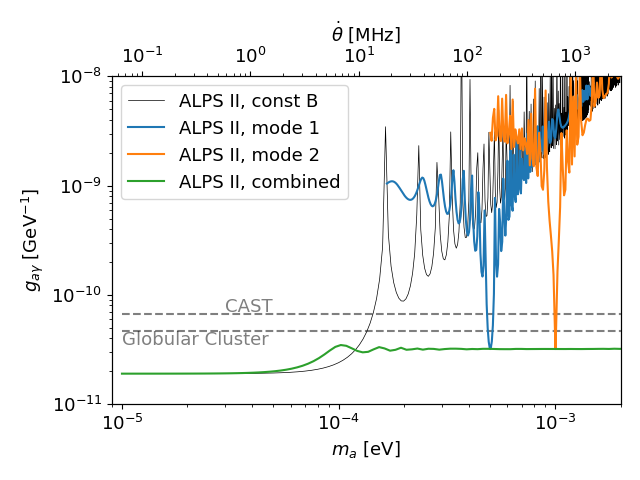

In [453]:
fig, ax1 = plt.subplots()

plt_ma_min = 9e-6
plt_ma_max = 2e-3


# add another x axis
ax2 = ax1.twiny()
plt.plot(ma0_arr**2/2./omega_ref*ba._eV_over_MHz_, ga_constB_arr, alpha=0)
plt.xscale('log')
plt.xlim(plt_ma_min**2/2./omega_ref*ba._eV_over_MHz_, plt_ma_max**2/2./omega_ref*ba._eV_over_MHz_)
plt.xlabel(r'$\dot\theta$ [MHz]')

plt.sca(ax1)
plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=-1, linewidth=0.5) # same as O'Hare

plt.plot(ma1_arr, ga_ma1_arr, label=r"ALPS II, mode 1")
plt.plot(ma2_arr, ga_ma2_arr, label=r"ALPS II, mode 2")
plt.plot(ma_N10_arr, ga_N10_arr, label=r"ALPS II, combined")

ga_CAST = 6.644905319962873e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(3e-5, 7e-11, 'CAST', alpha=0.5)

ga_CAST = 4.7e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(1e-5, 3.5e-11, 'Globular Cluster', alpha=0.5)



plt.yscale('log')
plt.xscale('log')
plt.xlim(plt_ma_min, plt_ma_max)
plt.ylim(1e-11, 1e-8)
# plt.ylim(1e-11, 5e-9)
plt.legend()
plt.xlabel('$m_a$ [eV]')
plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
plt.tight_layout()

# plt.savefig('plots/ma-ga-alpsii-perfect.pdf')

In [505]:
2.**(3/4)

1.681792830507429

In [504]:
3.19/1.9

1.6789473684210527

In [304]:
3.19479/1.90266

1.6791176563337642

In [305]:
2**(3./4)

1.681792830507429

In [307]:
2.25294/1.90266

1.1841001545205134

In [308]:
2**(1./4)

1.189207115002721

In [236]:
# ma = 3.e-5
# ga = 1e-11
# wavelength = 1064
# omega = 2.*np.pi/wavelength*ba._one_over_nm_eV_

# omega
# 1.1652650535538207

1.1652650535538207

(cB*_cB_rescale_factor_)**2/k**2 0.998303317874833
dtheta_arr [-3.86645764e-10 -3.86470209e-10 -3.85766722e-10 -3.86350963e-10
 -3.86370341e-10 -3.86205060e-10 -3.85482005e-10 -3.86366998e-10
 -3.86113644e-10 -3.85852835e-10]
theta_dot=-3.861786e-10
dtheta_fn(x) -3.8585283511076226e-10
mass_phase -3.8617823355089196e-10
ma2_over_om=-3.861782e-10
cB=1.035370e-17
k=7.899784e-12
ma=3.000000e-05
_cB_rescale_factor_: 7.623440e+05
tolerance:  1.0000000000000001e-11


<IPython.core.display.Javascript object>


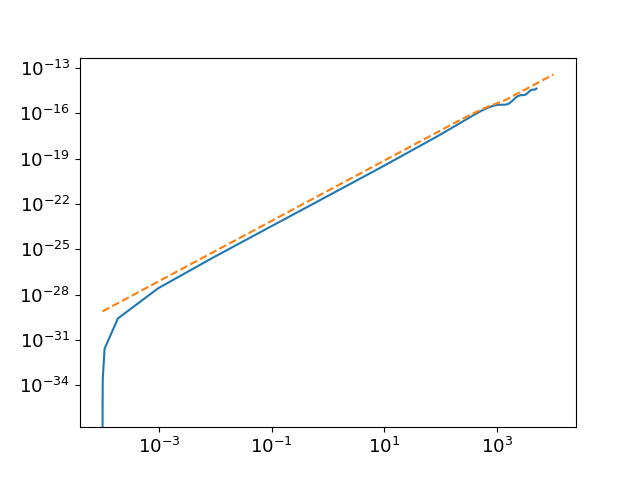

In [300]:
ma = 3.e-5
ga = 1e-11
wavelength = 1064
omega = 2.*np.pi/wavelength*ba._one_over_nm_eV_
theta_dot = ma**2/(2.*omega)
# theta_dot = 0.


sol_tmpp = ba.get_psurv(
        ma=ma,
        ga=ga,
        xe=5000,
        sigma=0.001, 
        theta_dot_mean=1., 
        num_of_domains=10,
        wavelength=wavelength,
        verbose=True,
        axion_init=False)

plt.subplots()
plt.plot(sol_tmpp.t/ba._m_eV_, np.abs(sol_tmpp.y[2])**2/sol_tmpp._cB_rescale_factor_**2)
# plt.plot(sol_tmpp.t/ba._m_eV_, np.abs(sol_tmpp.y[1])**2/sol_tmpp._cB_rescale_factor_**2)
# plt.plot(sol_tmpp.t/ba._m_eV_, (1-np.abs(sol_tmpp.y[0])**2)/sol_tmpp._cB_rescale_factor_**2)

x_tmpp_arr = np.logspace(-4, 4, 500)
psurv_prod_tmpp_arr = ba.Pag_helical(ga, ma, B=5.6, 
                                     omega=omega, 
                                     L=x_tmpp_arr, 
                                     theta_dot=theta_dot)
plt.plot(x_tmpp_arr, psurv_prod_tmpp_arr, '--')

plt.yscale('log')
plt.xscale('log')

In [ ]:
# why is [1 0 0] i.c. so weird
# [1/np.sqrt(2) 1/np.sqrt(2) 1] seems okay

In [209]:
2.26/1.9

1.1894736842105262

In [210]:
2**(1./4)

1.189207115002721

In [207]:
3.19e-11/1.9e-11

1.6789473684210527

In [208]:
2**(3./4)

1.681792830507429

In [649]:
(2.67e-11/1.87e-11)**2

2.038634218879579

#### 1% Gaussian noise N=10 vs N=5000

#### fixed noise $\delta \dot\theta = $1 GHz  (N=10)

This will be a cut-off for the cancellation. $\dot\theta$ will not be controlled higher than $\pm 1\;\mathrm{GHz}$

# Load the cluster results

Here we plot out the results from the run on the cluster. It needs to first run with scan.py. For example:

```
$ python scan.py -s 0 -e 106 -B 5.3 -w 1064 -N 100 -l -4.5 -u -2.9 -g 5  -n 10 -c 1.e-9 -f 0.01 -t 1. -o chains/run002
python scan.py
    -s < initial coordinate >
     -e < end of propagation >
     -B < magnetic field in Tesla >
     -w < laser wavelength in nm >
     -N < number of domains >
     -l < lower value of log10ma >
     -u < lower value of log10ma >
     -g < grid size >
     -o < output folder >
     -n < number of polls>
     -c < ga in GeV**-1>
     -v < variation of noise>
     -f < fraction variation of noise
     -t < theta dot mean>
100%|████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.01s/it]
```

In [12]:
# from the flat part of ALPS II
ga_ref_ALPSII = 1.897378608795087830e-11 # GeV**-1
B_ref = 5.3 # Tesla
x_ref = 106 # meter
psurv_ALPSII = 1./4* (ga_ref_ALPSII* B_ref *x_ref * ba._G_over_GeV2_*ba._Tesla_over_Gauss_*ba._m_eV_*ba._GeV_over_eV_ )**2
print(psurv_ALPSII)

2.784054425617672e-17


In [23]:
# path = './chains/run007_N10_f010/result.dat'
path = './chains/run020_N10_f003/result.dat'
ma_arr, grouped_psurv_dct, data = sc.load_scan(path)
meta_param = data[-1]
param = data[0][1]

<IPython.core.display.Javascript object>


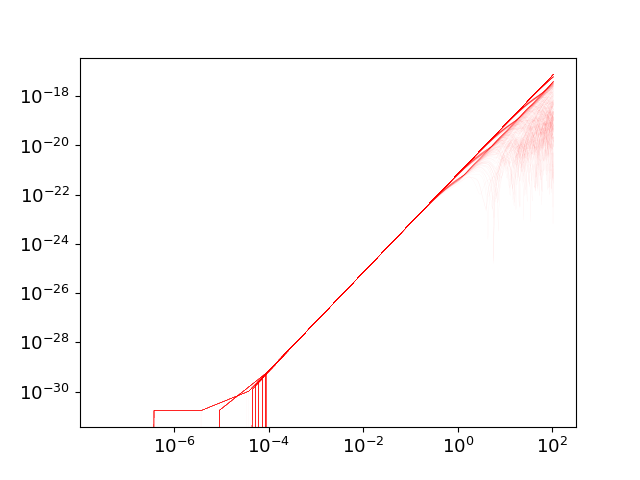

In [24]:
# plot out the solutions
plt.subplots()
for (sol, param) in data[40:-1]:
    plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 'r', alpha=0.1, linewidth=0.1)

plt.yscale('log')
plt.xscale('log')


In [154]:
# # get contours
# def get_contours(ma_arr, grouped_psurv_dct, param):
#     grouped_ga_dct = {}
#     log10ga_sigma_arr = []
#     log10ga_mean_arr = []


#     for i, ma in enumerate(np.unique(ma_arr)):
#         psurv_arr = grouped_psurv_dct[str(i+1)]    
#         ga_arr = sc.get_contour(psurv_arr, param.ga, psurv_ALPSII)
#         grouped_ga_dct[str(i+1)] = ga_arr
#         #log10sigma = np.log10(np.std(ga_arr))
#         #log10mean = np.log10(np.mean(ga_arr))
#         log10mean = np.mean(np.log10(ga_arr))
#         log10sigma = np.std(np.log10(ga_arr))
#         # grouped_ga_dct[str(i+1)+'mean'] = log10mean
#         # grouped_ga_dct[str(i+1)+'sigma'] = log10sigma
#         # log10sigma = (np.std(ga_arr))
#         # log10mean = (np.mean(ga_arr))
#         log10ga_mean_arr.append(log10mean)
#         log10ga_sigma_arr.append(log10sigma)

#     log10ga_sigma_arr = np.array(log10ga_sigma_arr)
#     log10ga_mean_arr = np.array(log10ga_mean_arr)
#     return log10ga_mean_arr, log10ga_sigma_arr



<IPython.core.display.Javascript object>


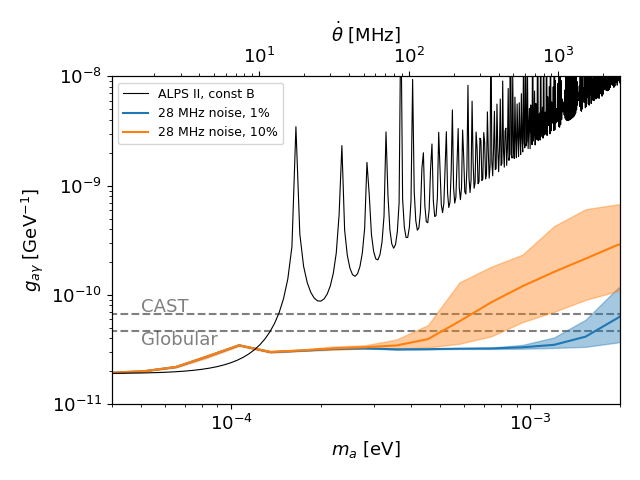

In [446]:
fig, ax1 = plt.subplots()
plt_ma_min = 4e-5
plt_ma_max = 2e-3


# add another x axis
ax2 = ax1.twiny()
plt.plot(ma0_arr**2/2./omega_ref*ba._eV_over_MHz_, ga_constB_arr, alpha=0)
plt.xscale('log')
plt.xlim(plt_ma_min**2/2./omega_ref*ba._eV_over_MHz_, plt_ma_max**2/2./omega_ref*ba._eV_over_MHz_)
plt.xlabel(r'$\dot\theta$ [MHz]')

plt.sca(ax1)
plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=100, linewidth=0.8) # same as O'Hare

path_prod = './chains/run024_prod_N10_f001/result.dat'
path_det = './chains/run021_N10_f001/result.dat'

(unique_ma_arr,
 ga_mean_arr, 
 ga_up_arr,
 ga_low_arr,
 grouped_ga_dct) = sc.get_contours(path_prod, path_det)

p = plt.plot(np.unique(ma_arr2), ga_mean_arr, '-', label='28 MHz noise, 1%')
plt.fill_between(unique_ma_arr, 
                 ga_up_arr,
                 ga_low_arr,
                 color=p[0].get_color(),
                 alpha=0.4)


path_prod = './chains/run024_prod_N10_f010/result.dat'
path_det = './chains/run021_N10_f010/result.dat'

(unique_ma_arr,
 ga_mean_arr, 
 ga_up_arr,
 ga_low_arr,
 grouped_ga_dct) = sc.get_contours(path_prod, path_det)

p = plt.plot(np.unique(ma_arr2), ga_mean_arr, '-', label='28 MHz noise, 10%')
plt.fill_between(unique_ma_arr, 
                 ga_up_arr,
                 ga_low_arr,
                 color=p[0].get_color(),
                 alpha=0.4)



# other bounds
ga_CAST = 6.644905319962873e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(5e-5, 7e-11, 'CAST', alpha=0.5)

ga_CAST = 4.7e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(5e-5, 3.5e-11, 'Globular', alpha=0.5)



plt.yscale('log')
plt.xscale('log')
plt.xlim(plt_ma_min, plt_ma_max)
plt.ylim(1e-11, 1e-8)
plt.legend(prop={'size': 9})
plt.xlabel('$m_a$ [eV]')
plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
plt.tight_layout()
# plt.savefig('./plots/N10-1-10-pct.pdf')

In [404]:
2.7/1.9

1.4210526315789476

In [399]:
2.69/1.9

1.4157894736842105

In [396]:
2**(3./4)

1.681792830507429

<IPython.core.display.Javascript object>


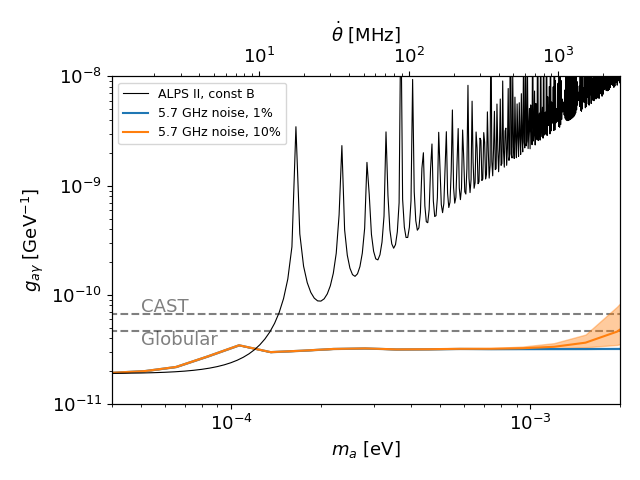

In [449]:
fig, ax1 = plt.subplots()
plt_ma_min = 4e-5
plt_ma_max = 2e-3


# add another x axis
ax2 = ax1.twiny()
plt.plot(ma0_arr**2/2./omega_ref*ba._eV_over_MHz_, ga_constB_arr, alpha=0)
plt.xscale('log')
plt.xlim(plt_ma_min**2/2./omega_ref*ba._eV_over_MHz_, plt_ma_max**2/2./omega_ref*ba._eV_over_MHz_)
plt.xlabel(r'$\dot\theta$ [MHz]')

plt.sca(ax1)

plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=100, linewidth=0.8) # same as O'Hare

path_prod = './chains/run024_prod_N2000_f001/result.dat'
# path_prod = './chains/run023_prod_N2000_f001/result.dat'
# path_prod = './chains/run021_N2000_f001/result.dat'
path_det = './chains/run021_N2000_f001/result.dat'

(unique_ma_arr,
 ga_mean_arr, 
 ga_up_arr,
 ga_low_arr,
 grouped_ga_dct) = sc.get_contours(path_prod, path_det)

p = plt.plot(np.unique(ma_arr2), ga_mean_arr, '-', label='5.7 GHz noise, 1%')
plt.fill_between(unique_ma_arr, 
                 ga_up_arr,
                 ga_low_arr,
                 color=p[0].get_color(),
                 alpha=0.4)



path_prod = './chains/run024_prod_N2000_f010/result.dat'
# path_prod = './chains/run023_prod_N2000_f010/result.dat'
# path_prod = './chains/run021_N2000_f010/result.dat'
path_det = './chains/run021_N2000_f010/result.dat'

(unique_ma_arr,
 ga_mean_arr, 
 ga_up_arr,
 ga_low_arr,
 grouped_ga_dct) = sc.get_contours(path_prod, path_det)

p = plt.plot(np.unique(ma_arr2), ga_mean_arr, '-', label='5.7 GHz noise, 10%')
plt.fill_between(unique_ma_arr, 
                 ga_up_arr,
                 ga_low_arr,
                 color=p[0].get_color(),
                 alpha=0.4)






# other bounds
ga_CAST = 6.644905319962873e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(5e-5, 7e-11, 'CAST', alpha=0.5)

ga_CAST = 4.7e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(5e-5, 3.5e-11, 'Globular', alpha=0.5)




plt.yscale('log')
plt.xscale('log')
plt.xlim(plt_ma_min, plt_ma_max)
plt.ylim(1e-11, 1e-8)
plt.legend(prop={'size': 9})
plt.xlabel('$m_a$ [eV]')
plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
plt.tight_layout()
# plt.savefig('./plots/N2000-1-10-pct.pdf')

In [521]:
# numerical results
path_prod = './chains/run024_prod_N2000_f010/result.dat'
ma_prod_arr, grouped_psurv_prod_dct, data_prod = sc.load_scan(path_prod)
param_prod = data_prod[0][1]
    
path_det = './chains/run021_N2000_f010/result.dat'
ma_det_arr, grouped_psurv_det_dct, data_det = sc.load_scan(path_det)
param_det = data_det[0][1]

In [525]:
data_prod[0]

array([ _cB_rescale_factor_: 35959623.78801488
                    message: 'The solver successfully reached the end of the integration interval.'
                       nfev: 48140
                       njev: 0
                        nlu: 0
                      psurv: 7.538929883583645e-18
                     status: 0
                    success: True
                          t: array([0.00000000e+00, 2.35009274e-01, 2.58510202e+00, ...,
              5.36857602e+08, 5.37014739e+08, 5.37179442e+08])
                   t_events: None
                  tolerance: 1.0000000000000001e-11
                          y: array([[ 0.00000000e+00+0.00000000e+00j,  6.39396776e-32-2.41786469e-42j,
                8.51037109e-29-3.53999570e-38j, ...,
                7.53127180e-04-6.53189733e-05j,  7.53781336e-04-6.53950040e-05j,
                7.54467377e-04-6.54747649e-05j],
              [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+3.21669785e-32j,
                1.00000000e+00+4.28

In [555]:
def get_solutions(path):
    ma_det_arr, grouped_psurv_det_dct, data_det = sc.load_scan(path_det)
    
    counter = 0
    sol_arr = []
    param_arr = []

    for sol, param in data_det[:-1]:
        if param.ma < 1.1e-3 and param.ma>0.9e-3:
            counter += 1
            sol_arr.append(sol)
            param_arr.append(param)
    print(counter)
    print(param_arr[0].ma)
    return sol_arr, param_arr

<IPython.core.display.Javascript object>


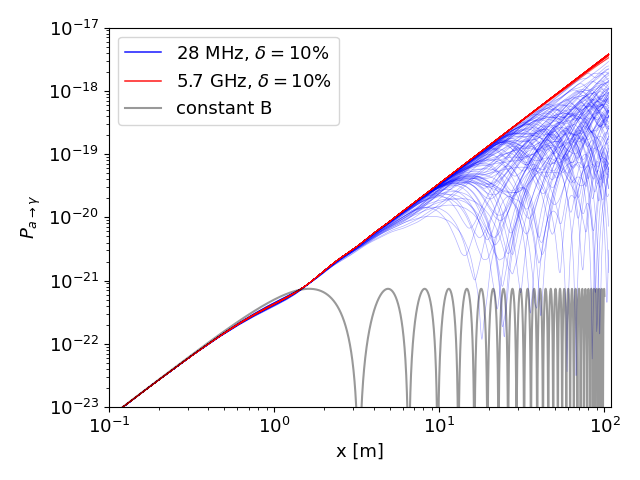

100
0.000941204967268067
100
0.000941204967268067


In [575]:
plt.subplots()

# numerical results



path_det = './chains/run021_N10_f010/result.dat'
sol_arr, param_arr = get_solutions(path_det)
for sol in sol_arr:
    plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 
             linewidth=0.5, color='b', alpha=0.3)
plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2/1e100, 
             linewidth=1.1, color='b', alpha=0.9, label='28 MHz, $\delta=10\%$')

    
path_det = './chains/run021_N2000_f010/result.dat'
sol_arr, param_arr = get_solutions(path_det)
for sol in sol_arr:
    plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 
             linewidth=0.5, color='r', alpha=0.3)
plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2/1e100, 
             linewidth=1.1, color='r', alpha=0.9, label='5.7 GHz, $\delta=10\%$')

    

t_arr = np.logspace(-3, 2, 5000)
plt.plot(t_arr, ba.Pag_helical(ga=param_arr[0].ga,
                               ma=param_arr[0].ma,
                               B=param_arr[0].B,
                               omega=param_arr[0].omega, 
                               L=t_arr, 
                               theta_dot=0.), 'k-', alpha=0.4, label='constant B') # constant



plt.legend()
plt.xlabel('x [m]')
plt.ylabel(r'$P_{a \rightarrow \gamma}$')
plt.xlim(1e-1, 110)
plt.ylim(1e-23, 1e-17)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
# plt.savefig('plots/num-vs-ana-10pct.pdf')
# plt.savefig('plots/num-vs-ana.pdf')
# plt.savefig('plots/gaussian-1pct.pdf')
# plt.savefig('plots/gaussian-1pct.png')

In [336]:
# x_arr = np.random.standard_normal(10000)
# plt.subplots()
# plt.hist(x_arr, bins=20)

# mean = np.quantile(x_arr, 0.5)
# plt.vlines(mean, 0, 1000, color='k', linestyles='-')

# mean_p_sigma = np.quantile(x_arr, 0.84)
# mean_m_sigma = np.quantile(x_arr, 0.16)
# plt.vlines(mean_p_sigma, 0, 1000, color='k', linestyles='--')
# plt.vlines(mean_m_sigma, 0, 1000, color='k', linestyles='--')

# mean_p_sigma = np.quantile(x_arr, 0.975)
# mean_m_sigma = np.quantile(x_arr, 0.015)
# plt.vlines(mean_p_sigma, 0, 1000, color='k', linestyles='--')
# plt.vlines(mean_m_sigma, 0, 1000, color='k', linestyles='--')

In [340]:
# plt.subplots()

# plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=100) # same as O'Hare
# # plt.plot(ma_N10_arr, ga_N10_arr, '--', label=r"ALPS II, ideal")



# # detection
# path = './chains/run021_N10_f001/result.dat'
# ma_arr2, grouped_psurv_dct2, data2 = sc.load_scan(path)
# param2 = data2[0][1]

# # get contours
# log10ga_mean_arr, log10ga_sigma_arr = get_contours(ma_arr2, grouped_psurv_dct2, param2)
# p = plt.plot(np.unique(ma_arr2), 10**log10ga_mean_arr, '-', label='28 MHz, 1%')

# # cut out unphysical downward fluctuation
# lower_arr = []
# ga_ideal = ga_N10_arr[-1]
# for i,x in enumerate(10**(log10ga_mean_arr-2*log10ga_sigma_arr)):
#     if np.unique(ma_arr2)[i] > 2e-4:
#         # cut out the part below ideal
#         res = max(x, ga_ideal) 
#         lower_arr.append(res)
#     else:
#         lower_arr.append(x)
# lower_arr = np.array(lower_arr)

# plt.fill_between(np.unique(ma_arr2), 
#                  #10**(log10ga_mean_arr-2.*log10ga_sigma_arr), 
#                  lower_arr,
#                  10**(log10ga_mean_arr+2.*log10ga_sigma_arr),
#                  color=p[0].get_color(),
#                  alpha=0.4)





# path = './chains/run021_N10_f010/result.dat'
# ma_arr2, grouped_psurv_dct2, data2 = sc.load_scan(path)
# param2 = data2[0][1]

# # get contours
# log10ga_mean_arr, log10ga_sigma_arr = get_contours(ma_arr2, grouped_psurv_dct2, param2)
# p = plt.plot(np.unique(ma_arr2), 10**log10ga_mean_arr, '-', label='28 MHz, 10%')

# # cut out unphysical downward fluctuation
# lower_arr = []
# ga_ideal = ga_N10_arr[-1]
# for i,x in enumerate(10**(log10ga_mean_arr-2*log10ga_sigma_arr)):
#     if np.unique(ma_arr2)[i] > 2e-4:
#         # cut out the part below ideal
#         res = max(x, ga_ideal) 
#         lower_arr.append(res)
#     else:
#         lower_arr.append(x)
# lower_arr = np.array(lower_arr)

# plt.fill_between(np.unique(ma_arr2), 
#                  #10**(log10ga_mean_arr-2.*log10ga_sigma_arr), 
#                  lower_arr,
#                  10**(log10ga_mean_arr+2.*log10ga_sigma_arr),
#                  color=p[0].get_color(),
#                  alpha=0.4)




# plt.yscale('log')
# plt.xscale('log')
# # plt.xlim(9e-6, 2e-3)
# plt.xlim(4e-5, 2e-3)
# plt.ylim(1e-11, 1e-8)
# plt.legend(prop={'size': 11})
# plt.xlabel('$m_a$ [eV]')
# plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
# plt.tight_layout()
# # plt.savefig('./plots/N10-1-10-pct.pdf')

<IPython.core.display.Javascript object>


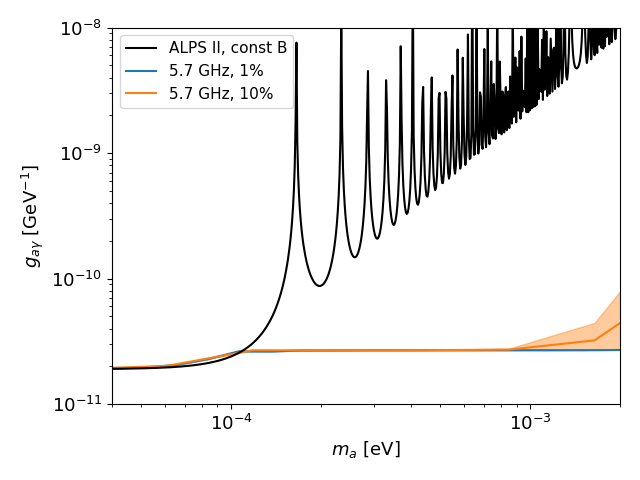

In [170]:
# plt.subplots()

# plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=100) # same as O'Hare
# # plt.plot(ma_N10_arr, ga_N10_arr, '--', label=r"ALPS II, ideal")



# path = './chains/run021_N2000_f001/result.dat'
# ma_arr2, grouped_psurv_dct2, data2 = sc.load_scan(path)
# param2 = data2[0][1]

# # get contours
# log10ga_mean_arr, log10ga_sigma_arr = get_contours(ma_arr2, grouped_psurv_dct2, param2)
# p = plt.plot(np.unique(ma_arr2), 10**log10ga_mean_arr, '-', label='5.7 GHz, 1%')

# # cut out unphysical downward fluctuation
# lower_arr = []
# ga_ideal = ga_N10_arr[-1]
# for i,x in enumerate(10**(log10ga_mean_arr-2*log10ga_sigma_arr)):
#     if np.unique(ma_arr2)[i] > 2e-4:
#         # cut out the part below ideal
#         res = max(x, ga_ideal) 
#         lower_arr.append(res)
#     else:
#         lower_arr.append(x)
# lower_arr = np.array(lower_arr)

# plt.fill_between(np.unique(ma_arr2), 
#                  #10**(log10ga_mean_arr-2.*log10ga_sigma_arr), 
#                  lower_arr,
#                  10**(log10ga_mean_arr+2.*log10ga_sigma_arr),
#                  color=p[0].get_color(),
#                  alpha=0.4)





# path = './chains/run020_N2000_f010/result.dat'
# ma_arr2, grouped_psurv_dct2, data2 = sc.load_scan(path)
# param2 = data2[0][1]

# # get contours
# log10ga_mean_arr, log10ga_sigma_arr = get_contours(ma_arr2, grouped_psurv_dct2, param2)
# p = plt.plot(np.unique(ma_arr2), 10**log10ga_mean_arr, '-', label='5.7 GHz, 10%')

# # cut out unphysical downward fluctuation
# lower_arr = []
# ga_ideal = ga_N10_arr[-1]
# for i,x in enumerate(10**(log10ga_mean_arr-2*log10ga_sigma_arr)):
#     if np.unique(ma_arr2)[i] > 2e-4:
#         # cut out the part below ideal
#         res = max(x, ga_ideal) 
#         lower_arr.append(res)
#     else:
#         lower_arr.append(x)
# lower_arr = np.array(lower_arr)

# plt.fill_between(np.unique(ma_arr2), 
#                  #10**(log10ga_mean_arr-2.*log10ga_sigma_arr), 
#                  lower_arr,
#                  10**(log10ga_mean_arr+2.*log10ga_sigma_arr),
#                  color=p[0].get_color(),
#                  alpha=0.4)



# # path = './chains/run020_N2000_f010/result.dat'
# # ma_arr2, grouped_psurv_dct2, data2 = sc.load_scan(path)
# # param2 = data2[0][1]

# # # get contours
# # log10ga_mean_arr, log10ga_sigma_arr = get_contours(ma_arr2, grouped_psurv_dct2, param2)
# # p = plt.plot(np.unique(ma_arr2), 10**log10ga_mean_arr, '-', label='5.7 GHz, 10%')
# # plt.fill_between(np.unique(ma_arr2), 
# #                  10**(log10ga_mean_arr-2*log10ga_sigma_arr), 
# #                  10**(log10ga_mean_arr+2*log10ga_sigma_arr),
# #                  color=p[0].get_color(),
# #                  alpha=0.4)



# plt.yscale('log')
# plt.xscale('log')
# # plt.xlim(9e-6, 2e-3)
# plt.xlim(4e-5, 2e-3)
# plt.ylim(1e-11, 1e-8)
# plt.legend(prop={'size': 11})
# plt.xlabel('$m_a$ [eV]')
# plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
# plt.tight_layout()

# # plt.savefig('./plots/N2000-1-10-pct.pdf')

In [ ]:
# cross check the solution

In [76]:
# sol_N10_arr
# ma_N10_arr[84]


<IPython.core.display.Javascript object>


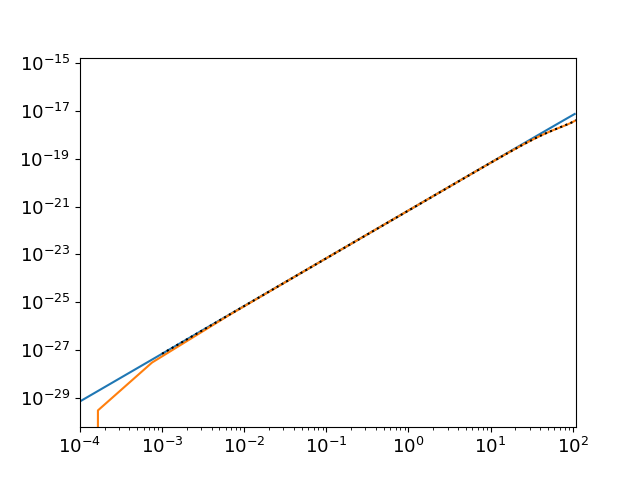

(0.0001, 110)

In [102]:
# plt.subplots()

# # production run result
# (sol_tmp, param_tmp) = data2[205]
# plt.plot(sol_tmp.t/ba._m_eV_, (1-np.abs(sol_tmp.y[2])**2)/sol_tmp._cB_rescale_factor_**2)


# # compare with previous numerical result
# sol_tmp = sol_N10_arr[84]
# plt.plot(sol_tmp.t/ba._m_eV_, (1-np.abs(sol_tmp.y[2])**2)/sol._cB_rescale_factor_**2)



# # compare with the analytic result
# x_arr = np.logspace(-3, 3, 5000)
# # ma = param_tmp.ma
# # ma = 1e-4
# ma = ma_N10_arr[84]
# cB = param_tmp.ga*param_tmp.B*1e4*ba._G_over_GeV2_*ba._GeV_over_eV_ #[eV]
# omega = 2.*np.pi/param_tmp.wavelength*ba._one_over_nm_eV_/10.
# theta_dot = -ma**2/2./omega
# plt.plot(x_arr, ba.Pag_helical(ga=param_tmp.ga, 
#                                ma=ma, 
#                                B=param.B,
#                                omega=omega, 
#                                L=x_arr,
#                                theta_dot=theta_dot),
#          'k:', label=r'analytic')


# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1e-4, 110)

(cB*_cB_rescale_factor_)**2/k**2 10869.239804596247
dtheta_arr [-4.28570556e-09 -4.28717476e-09 -4.29653724e-09 -4.29686568e-09
 -4.29704545e-09 -4.28495936e-09 -4.28667727e-09 -4.28537488e-09
 -4.29428864e-09 -4.29444044e-09]
theta_dot=-4.290874e-09
dtheta_fn(x) -4.294440439175358e-09
mass_phase -4.290869261676577e-09
ma2_over_om=-4.290869e-09
cB=1.035370e-17
k=-3.571177e-12
ma=1.000000e-04
_cB_rescale_factor_: 3.595966e+07
tolerance:  1.0000000000000001e-11


<IPython.core.display.Javascript object>


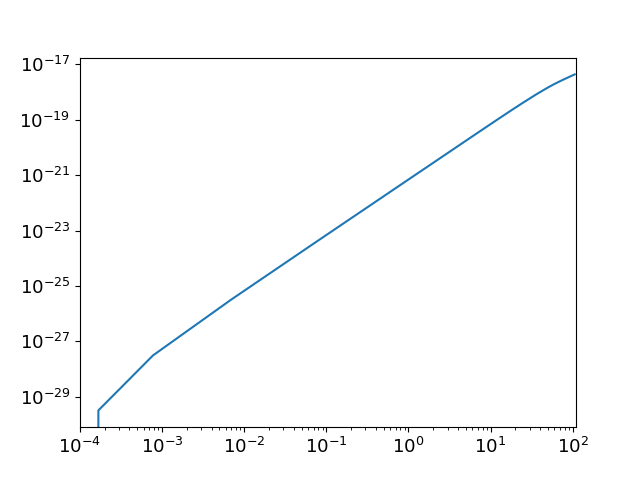

(0.0001, 110)

In [81]:
# sol_tmp = ba.get_psurv(
#         ma=1e-4,
#         ga=1e-11,
#         sigma=0.001, 
#         theta_dot_mean=1., 
#         num_of_domains=10,
#         wavelength=1064,
#         verbose=True)


# plt.subplots()
# plt.plot(sol_tmp.t/ba._m_eV_, (1-np.abs(sol_tmp.y[2])**2)/sol._cB_rescale_factor_**2)

# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1e-4, 110)

In [173]:
# photon to axion conversion

In [425]:
ma_N10_arr = np.logspace(-5, -2.5, 100)
sol_N10_arr = []
ga_ref = 1e-11
N = 10



for ma in tqdm(ma_N10_arr):
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.001, 
        theta_dot_mean=1., 
        num_of_domains=N,
        wavelength=1064,
        verbose=False)
    sol_N10_arr.append(sol)


ga_N10_arr = []
for sol in sol_N10_arr:
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    # print(psurv)
    ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    ga_N10_arr.append(ga)

100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


In [454]:
ma_N10_arr2 = np.logspace(-5, -2.5, 50)
sol_N10_arr2 = []
ga_ref2 = 1e-11
N2 = 10


for ma2 in tqdm(ma_N10_arr2):
    sol2 = ba.get_psurv(
        ma=ma2,
        ga=ga_ref2,
        sigma=0.001, 
        theta_dot_mean=1., 
        num_of_domains=N2,
        wavelength=1064,
        verbose=False,
        axion_init=False)
    sol_N10_arr2.append(sol2)

ga_N10_arr2 = []
for sol2 in sol_N10_arr2:
    psurv2 = ((np.abs(sol2.y[2])**2)/sol2._cB_rescale_factor_**2)[-1]
    # print(psurv)
    ga2 = ga_ref2 / (psurv2/psurv_ALPSII)**0.5
    ga_N10_arr2.append(ga2)


100%|██████████| 50/50 [00:23<00:00,  2.10it/s]


<IPython.core.display.Javascript object>


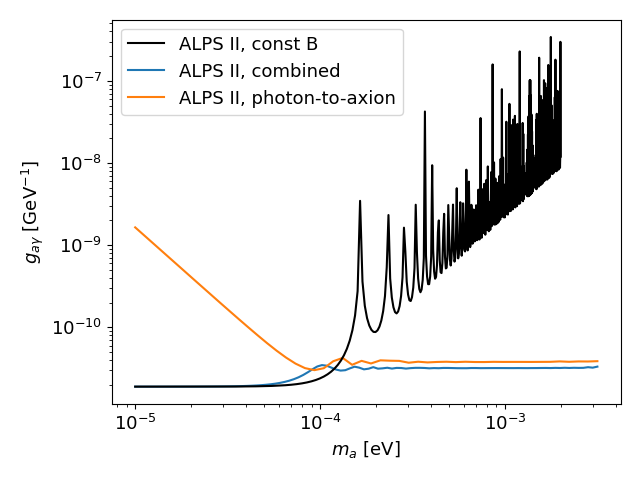

In [455]:

plt.subplots()
plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=100) # same as O'Hare
# plt.plot(ma1_arr, ga_ma1_arr, label=r"ALPS II, mode 1")
# plt.plot(ma2_arr, ga_ma2_arr, label=r"ALPS II, mode 2")
plt.plot(ma_N10_arr, ga_N10_arr, label=r"ALPS II, combined")
plt.plot(ma_N10_arr2, ga_N10_arr2, label=r"ALPS II, photon-to-axion")

plt.yscale('log')
plt.xscale('log')
#plt.xlim(9e-6, 2e-3)
#plt.ylim(1e-11, 1e-8)
# plt.ylim(1e-11, 5e-9)
plt.legend()
plt.xlabel('$m_a$ [eV]')
plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
plt.tight_layout()
# plt.savefig('plots/ma-ga-alpsii-perfect.pdf')

In [203]:
3.8e-11/2.69e-11

1.4126394052044609

In [432]:
param_tmp.wavelength

106.4

<IPython.core.display.Javascript object>


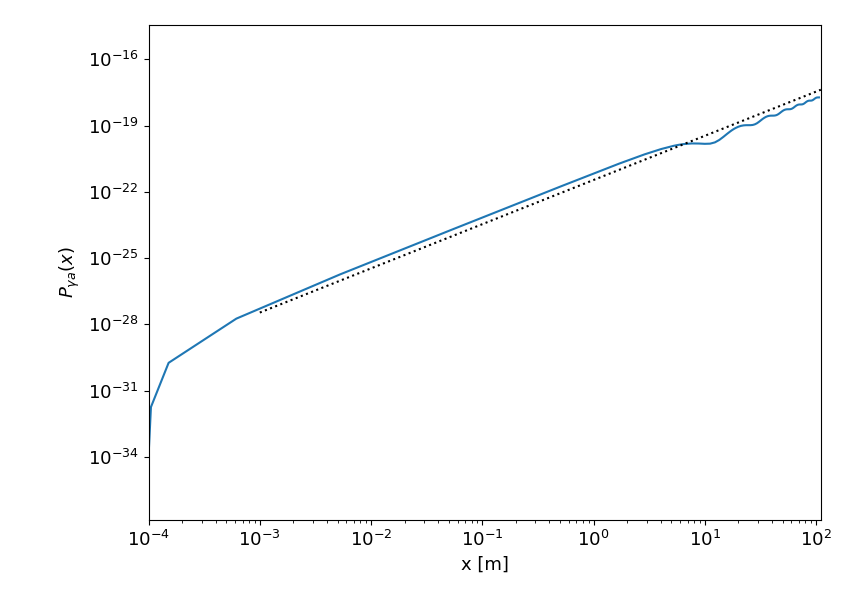

(cB*_cB_rescale_factor_)**2/k**2 0.9976162015351954
dtheta_arr [-3.86652289e-08 -3.86757022e-08 -3.86529160e-08 -3.86042873e-08
 -3.86653478e-08 -3.86043106e-08 -3.85838032e-08 -3.85833504e-08
 -3.86628409e-08 -3.86360230e-08]
theta_dot=-3.861786e-08
dtheta_fn(x) -3.8636023047280956e-08
mass_phase -3.861782335508919e-08
ma2_over_om=-3.861782e-08
cB=1.035370e-17
k=3.727600e-10
ma=3.000000e-04
_cB_rescale_factor_: 3.595966e+07
tolerance:  1.0000000000000001e-11


In [508]:
ma = 3e-4
ga = 1e-11
B = 5.3
wavelength = 1064

plt.subplots()
sol_tmp = ba.get_psurv(
        ma=ma,
        ga=ga,
        sigma=0.001, 
        theta_dot_mean=1., 
        num_of_domains=10,
        wavelength=1064,
        verbose=True,
        axion_init=False)
# plt.plot(sol_tmp.t/ba._m_eV_, (1-np.abs(sol_tmp.y[2])**2)/sol._cB_rescale_factor_**2)
plt.plot(sol_tmp.t/ba._m_eV_, (np.abs(sol_tmp.y[2])**2)/sol._cB_rescale_factor_**2)


x_arr = np.logspace(-3, 3, 5000)
cB = ga*B*1e4*ba._G_over_GeV2_*ba._GeV_over_eV_ #[eV]
omega = 2.*np.pi/wavelength*ba._one_over_nm_eV_
theta_dot = -ma**2/2./omega
plt.plot(x_arr, ba.Pag_helical(ga=ga, 
                               ma=ma, 
                               B=B,
                               omega=omega, 
                               L=x_arr,
                               theta_dot=theta_dot),
         'k:', label=r'analytic')

# sol_tmp = ba.get_psurv(
#         ma=1e-4,
#         ga=1e-11,
#         sigma=0.001, 
#         theta_dot_mean=1., 
#         num_of_domains=10,
#         wavelength=1064,
#         verbose=True)
# plt.plot(sol_tmp.t/ba._m_eV_, (1-np.abs(sol_tmp.y[2])**2)/sol._cB_rescale_factor_**2)

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4, 110)
plt.xlabel(r"x [m]")
plt.ylabel(r"$P_{\gamma a}(x)$")
plt.tight_layout()

In [510]:
3.738/1.9

1.9673684210526317

In [509]:
3.495/1.9

1.8394736842105264

In [506]:
3.14/1.52

2.0657894736842106